#**PROBLEMA DE NEGOCIO**


---




La necesidad de prever y optimizar el gasto de sus usuarios ha llevado a una empresa de comercio electrónico a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para desarrollar un modelo de machine learning que pueda predecir con precisión cuánto gastará un usuario al visitar dicho sitio web.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Importar correctamente y analizar y comprender el conjunto de datos proporcionado, realizar limpieza de datos, eliminar atributos que no aportan valor y manejar valores faltantes.

**2. Exploración y Feature Engineering:** Realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes, identificar variables llaves, codificación de variables categóricas y normalización/escalado de datos.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Linear Regression, Decision Tree Regressor, Random Forest Regressor, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como el error cuadrático medio (MSE), la raíz cuadrada del error cuadrático medio (RMSE) y el coeficiente de determinación (R²). Seleccionar el modelo con el mejor rendimiento para la predicción del gasto de los usuarios.

#**1. Configuración del Ambiente**


---




In [97]:
!pip install wget
import wget
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# pd.set_option('display.max_columns', None)
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

#global df_traffic, resultados, modelo, modelo_clasificacion

#**2. Preprocesamiento de Datos**


---


In [98]:
## Importar el df, para analizar como se importa la informaciòn
df = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv')
df.sample(5)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
11579,Referral,20160818,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",7175055390653497913,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",7175055390653497913_1471563635,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""7"", ""pageviews"": ""7"",...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1471563635,1,1471563635
873,Direct,20170228,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1314028468319495962,"{""continent"": ""Europe"", ""subContinent"": ""South...",1314028468319495962_1488299029,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""5""}","{""campaign"": ""(not set)"", ""source"": ""(direct)""...",1488299029,2,1488299029
6484,Social,20161101,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2982316927170360863,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",2982316927170360863_1477993230,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""referralPath"": ""/yt/about/ro/"", ""campaign"": ...",1477993230,1,1477993230
11501,Organic Search,20161231,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1323672990415209613,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1323672990415209613_1483200850,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""18"", ""pageviews"": ""17...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1483200850,1,1483200850
12025,Organic Search,20170717,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3494012915726053347,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",3494012915726053347_1500328505,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""7"", ""pageviews"": ""7"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1500328505,1,1500328505


In [99]:
# Identificar el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  int64 
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  uint64
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  int64 
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(4), object(7), uint64(1)
memory usage: 1.1+ MB


In [100]:
# Importamos datos
# Argumento para especificar el tipo de datos (dtype) de ciertas columnas al cargar el archivo. Columnas date, fullVisitorId, y visitId deben tratarse como objetos, para evitar interpretaciones erróneas.
df_traffic = pd.read_csv('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/traffic_site.csv', dtype={'date':object,'fullVisitorId':object,'visitId':object})

In [101]:
# Convertimos las cadenas de texto a diccionarios json
columnas_a_cambiar = ['device', 'geoNetwork', 'totals', 'trafficSource']
for columna in columnas_a_cambiar:
    df_traffic[columna] = df_traffic[columna].apply(json.loads)

# Expandimos los diccionarios en columnas separadas y las unimos al df_traffic
for columna in columnas_a_cambiar:
    expander_columnas = pd.json_normalize(df_traffic[columna])
    df_traffic = pd.concat([df_traffic.drop([columna], axis=1), expander_columnas], axis=1)

In [102]:
df_traffic.sample(5)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode
2269,Organic Search,20161021,8201198635336781239,8201198635336781239_1477053072,Not Socially Engaged,1477053072,1,1477053072,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7073,Social,20161204,434197581947242288,434197581947242288_1480863714,Not Socially Engaged,1480863714,1,1480863714,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,/yt/about/pt-BR/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3264,Direct,20170503,2509106618768134639,2509106618768134639_1493837208,Not Socially Engaged,1493837208,2,1493837208,Chrome,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3394,Direct,20170426,2005882892312188779,2005882892312188779_1493247154,Not Socially Engaged,1493247154,1,1493247154,Chrome,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,Organic Search,20161118,9175170003081536658,9175170003081536658_1479466811,Not Socially Engaged,1479466811,4,1479466811,Safari,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channelGrouping                      12283 non-null  object
 1   date                                 12283 non-null  object
 2   fullVisitorId                        12283 non-null  object
 3   sessionId                            12283 non-null  object
 4   socialEngagementType                 12283 non-null  object
 5   visitId                              12283 non-null  object
 6   visitNumber                          12283 non-null  int64 
 7   visitStartTime                       12283 non-null  int64 
 8   browser                              12283 non-null  object
 9   browserVersion                       12283 non-null  object
 10  browserSize                          12283 non-null  object
 11  operatingSystem                      1228

In [104]:
# Identificar Valores unicos
columnas = df_traffic.columns

# Iterar sobre cada columna y obtener los valores únicos con su conteo, incluyendo los valores nulos para analizar las variables.
for columna in columnas:
    valores_conteo = df_traffic[columna].value_counts(dropna=False)
    print(f"...............Valores únicos para la columna '{columna}'..............:\n{valores_conteo}")

Se han truncado las últimas 5000 líneas del flujo de salida.
1493482344    1
1493529096    1
1493514854    1
1493477895    1
1493457332    1
1493473934    1
1493490450    1
1493150503    1
1493167628    1
1493122375    1
1493159148    1
1493109952    1
1493119640    1
1493111518    1
1493158682    1
1493144453    1
1493109211    1
1493159643    1
1493147034    1
1493163013    1
1493135929    1
1493109783    1
1493106182    1
1493155861    1
1493167842    1
1493144095    1
1493132524    1
1493130025    1
1493145202    1
1493146461    1
1493184390    1
1488789466    1
1488790431    1
1479130713    1
1480629585    1
1480602764    1
1480619562    1
1480621627    1
1480607598    1
1480649229    1
1480612969    1
1480625231    1
1480638067    1
1480581609    1
1480641547    1
1480584170    1
1480602688    1
1480585583    1
1480612343    1
1480580856    1
1480601332    1
1480610865    1
1480579966    1
1480656383    1
1480638216    1
1480602217    1
1480630606    1
1480579510    1
1498009548 

In [105]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channelGrouping                      12283 non-null  object
 1   date                                 12283 non-null  object
 2   fullVisitorId                        12283 non-null  object
 3   sessionId                            12283 non-null  object
 4   socialEngagementType                 12283 non-null  object
 5   visitId                              12283 non-null  object
 6   visitNumber                          12283 non-null  int64 
 7   visitStartTime                       12283 non-null  int64 
 8   browser                              12283 non-null  object
 9   browserVersion                       12283 non-null  object
 10  browserSize                          12283 non-null  object
 11  operatingSystem                      1228

In [106]:
# Seleccionar variables
df_traffic = df_traffic[['date','channelGrouping','fullVisitorId','visitNumber','visitStartTime','browser','operatingSystem','isMobile','deviceCategory','continent','subContinent','country','region','metro','city','hits','pageviews','bounces','newVisits','transactionRevenue','campaign','source','medium','isTrueDirect','referralPath','adwordsClickInfo.page','adwordsClickInfo.slot']]
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   12283 non-null  object
 1   channelGrouping        12283 non-null  object
 2   fullVisitorId          12283 non-null  object
 3   visitNumber            12283 non-null  int64 
 4   visitStartTime         12283 non-null  int64 
 5   browser                12283 non-null  object
 6   operatingSystem        12283 non-null  object
 7   isMobile               12283 non-null  bool  
 8   deviceCategory         12283 non-null  object
 9   continent              12283 non-null  object
 10  subContinent           12283 non-null  object
 11  country                12283 non-null  object
 12  region                 12283 non-null  object
 13  metro                  12283 non-null  object
 14  city                   12283 non-null  object
 15  hits               

In [107]:
#LIMPIAR DATOS
#Remplazar datos Nan por 0
df_traffic['bounces'] = df_traffic['bounces'].fillna(0)
df_traffic['newVisits'] = df_traffic['newVisits'].fillna(0)
df_traffic['transactionRevenue'] = df_traffic['transactionRevenue'].fillna(0)
df_traffic['referralPath'] = df_traffic['referralPath'].fillna(0)
df_traffic['adwordsClickInfo.page'] = df_traffic['adwordsClickInfo.page'].fillna('No_definido')
df_traffic['adwordsClickInfo.slot'] = df_traffic['adwordsClickInfo.slot'].fillna('No_Definido')

#Datos:boolean cambiar a 0 y 1
df_traffic['isTrueDirect'].fillna(False, inplace=True)
df_traffic['isTrueDirect_dummy'] = df_traffic['isTrueDirect'].astype(int)

df_traffic['isMobile'] = df_traffic['isMobile'].astype(int)

#Cambiar tipo de datos
#Convertir campos datetime
df_traffic['date'] = pd.to_datetime(df_traffic['date'],format='%Y-%m-%d %H:%M:%S')
df_traffic['visitStartTime'] = pd.to_datetime(df_traffic['visitStartTime'], unit='s')

#Convertir Campos a int
columnas_int =['hits','pageviews','bounces','newVisits']
for columna in columnas_int:
  df_traffic[columna] = df_traffic[columna].astype('int64')
#Convertir a float
columnas_float = ['transactionRevenue']
for columnas in columnas_float:
  df_traffic[columnas] = df_traffic[columnas].astype('float')

df_traffic['transactionRevenue'] = pd.to_numeric(df_traffic['transactionRevenue']) / 1000000

In [108]:
df_traffic.info()
df_traffic.sample(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   12283 non-null  datetime64[ns]
 1   channelGrouping        12283 non-null  object        
 2   fullVisitorId          12283 non-null  object        
 3   visitNumber            12283 non-null  int64         
 4   visitStartTime         12283 non-null  datetime64[ns]
 5   browser                12283 non-null  object        
 6   operatingSystem        12283 non-null  object        
 7   isMobile               12283 non-null  int64         
 8   deviceCategory         12283 non-null  object        
 9   continent              12283 non-null  object        
 10  subContinent           12283 non-null  object        
 11  country                12283 non-null  object        
 12  region                 12283 non-null  object        
 13  m

,date,channelGrouping,fullVisitorId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,...,newVisits,transactionRevenue,campaign,source,medium,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,isTrueDirect_dummy
373,2016-11-23,Direct,3416511081952038445,1,2016-11-24 07:50:57,Chrome,Windows,0,desktop,Europe,...,1,0.0,(not set),(direct),(none),True,0,No_definido,No_Definido,1
8771,2016-10-11,Organic Search,1658499418829502951,2,2016-10-11 17:25:47,Chrome,Macintosh,0,desktop,Americas,...,0,0.0,(not set),google,organic,True,0,No_definido,No_Definido,1


## CREACION DE VARIABLES

In [109]:
# Creo variable dummy para conumo (0=si, 1=no)
df_traffic['consumo']= df_traffic['transactionRevenue'].apply(lambda x : 0 if x == 0 else 1 )

In [110]:
# Creo Variable mes, dia y hora
#Variable Hora
df_traffic['hora'] = df_traffic['visitStartTime'].dt.hour

#Variable dia de la semana
df_traffic['dia_semana_nombre'] = df_traffic['visitStartTime'].dt.day_name()

#Variable mes
df_traffic['mes'] = df_traffic['visitStartTime'].dt.month

#Variable mes
df_traffic['año'] = df_traffic['visitStartTime'].dt.year

#Variable dia

df_traffic['dia'] = df_traffic['visitStartTime'].dt.day


In [111]:
# Creaciòn de variable para categorizar en tres horarios, mañana, tarde, noche, madrugada
df_traffic['horario'] = df_traffic.hora.apply(lambda x: '0:00-06:00'if x <= 6 else
                                      '06:00-12:00' if x <= 12 else
                                      '12:00-18:00' if x <= 18 else
                                      '18:00-24:00')

In [112]:
#Crear variable para ver cuantas veces ha ingresado usuario y ver su recurrencia total
contar_id_visitante = df_traffic.groupby('fullVisitorId').size().sort_values(ascending=False)
df_traffic['recurrencia'] = df_traffic.fullVisitorId.apply(lambda x : contar_id_visitante [x])

In [113]:
df_traffic.sample(5)

,date,channelGrouping,fullVisitorId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,...,adwordsClickInfo.slot,isTrueDirect_dummy,consumo,hora,dia_semana_nombre,mes,año,dia,horario,recurrencia
1087,2016-08-22,Organic Search,7898279012712758171,1,2016-08-23 00:08:55,Chrome,Windows,0,desktop,Asia,...,No_Definido,0,0,0,Tuesday,8,2016,23,0:00-06:00,1
11282,2017-05-17,Direct,4267818109290333399,1,2017-05-17 13:14:18,Chrome,Android,1,mobile,Asia,...,No_Definido,1,0,13,Wednesday,5,2017,17,12:00-18:00,1
1496,2016-09-12,Direct,3026556150514544788,2,2016-09-12 07:07:13,Chrome,Macintosh,0,desktop,Asia,...,No_Definido,1,0,7,Monday,9,2016,12,06:00-12:00,2
3678,2017-03-06,Direct,5221021439303196938,1,2017-03-06 14:43:40,Chrome,Windows,0,desktop,Americas,...,No_Definido,1,0,14,Monday,3,2017,6,12:00-18:00,1
6819,2017-05-05,Social,4995307417401747374,1,2017-05-05 10:57:12,Safari (in-app),iOS,1,mobile,Europe,...,No_Definido,0,0,10,Friday,5,2017,5,06:00-12:00,1


In [114]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   12283 non-null  datetime64[ns]
 1   channelGrouping        12283 non-null  object        
 2   fullVisitorId          12283 non-null  object        
 3   visitNumber            12283 non-null  int64         
 4   visitStartTime         12283 non-null  datetime64[ns]
 5   browser                12283 non-null  object        
 6   operatingSystem        12283 non-null  object        
 7   isMobile               12283 non-null  int64         
 8   deviceCategory         12283 non-null  object        
 9   continent              12283 non-null  object        
 10  subContinent           12283 non-null  object        
 11  country                12283 non-null  object        
 12  region                 12283 non-null  object        
 13  m

#**3. Exploración y Feature Engineering**


---


In [115]:
# Se saca un Df aparte para comparar comportamiento con los que consumen
df_consumos = df_traffic[df_traffic['consumo']== 1 ]

---
## *ANALISIS EXPLORATORIO DE DATOS*
---

# ***Resumen de Perspectivas Preliminares Derivadas del Análisis Exploratorio***

*   La mayoría de los puntos están agrupados cerca del eje X , lo que sugiere que muchas transacciones tienen consumos cero.

*   Número de Visitas (visitNumber): El análisis revela que, en promedio, los usuarios accedieron al sitio 3.67 veces, exhibiendo una variabilidad considerable (σ = 6.54), con un máximo de 58 visitas por individuo. Este dato sugiere una diversidad en el patrón de visitas, incluyendo tanto usuarios habituales como ocasionales, lo que podria indicar la necesidad de estrategias diferenciadas para la retención de clientes.

*   Uso de Dispositivos Móviles (isMobile):  Solo un 9.75% de las visitas se realizaron a través de dispositivos móviles, reflejando la predilección por plataformas de acceso tradicionales durante el periodo analizado. Esta tendencia concuerda con el periodo analizado (2016-2017), época previa al auge de los pagos mediante plataformas digitales móviles por posible impacto del COVID.

*   Interacciones (hits y pageviews): Se observó una media de 36.48 interacciones por visita, con los usuarios visualizando 28.62 páginas. Este nivel de engagement es indicativo de un comportamiento de compra activo, subrayando la importancia de un diseño web optimizado para maximizar la experiencia del usuario.

*   Nuevos Visitantes: Aproximadamente el 36.58% de las visitas fueron realizadas por nuevos usuarios, obsrvando una potencial oportunidad para aumentar la base de clientes leales.

*   Consumo Promedio por Transacción: El gasto promedio se situó en 108.44 unidades monetarias, con una notable variabilidad (σ = 145.67), lo que evidencia la diversidad en el valor de las transacciones.

*   Visitas Directas: El 64.02% de las visitas fueron clasificadas como directas, indicando que una mayoría de los consumidores acceden al sitio sin interaccion en otras paginas de consulta de compras, lo cual puede reflejar un hábito de compra establecido en el comercio electrónico.

*   Patrones Temporales: La tendencia de visitas indica una preferencia por las tardes (promedio de 14:17 horas) y los meses de junio y julio (promedio de 6.65), lo que podría influir en la planificación de campañas de marketing y promociones específicas para estos periodos..

*   Recurrencia: La frecuencia promedio de visitas es de aproximadamente 3.49 veces, lo que sugiere un nivel de lealtad y recurrencia entre los consumidores.





In [116]:
# Estaditsicos de toda la data posterior a la limpieza de datos
df_traffic.describe()

,visitNumber,isMobile,hits,pageviews,bounces,newVisits,transactionRevenue,isTrueDirect_dummy,consumo,hora,mes,año,dia,recurrencia
count,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000
mean,1.923390,0.269071,4.637141,3.871286,0.502483,0.768949,1.447871,0.316291,0.013352,12.534723,6.900757,2016.527558,15.705039,1.971912
std,5.878228,0.443495,10.136882,7.273662,0.500014,0.421522,20.893896,0.465047,0.114781,6.803641,3.498831,0.499260,8.793152,2.732665
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,1.000000,1.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.000000,4.000000,2016.000000,8.000000,1.000000
50%,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,14.000000,7.000000,2017.000000,16.000000,1.000000
75%,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,18.000000,10.000000,2017.000000,23.000000,2.000000
max,195.000000,1.000000,471.000000,305.000000,1.000000,1.000000,755.630000,1.000000,1.000000,23.000000,12.000000,2017.000000,31.000000,24.000000


In [117]:
# Estadisticos solo de consumos realizados
df_consumos.describe()

,visitNumber,isMobile,hits,pageviews,bounces,newVisits,transactionRevenue,isTrueDirect_dummy,consumo,hora,mes,año,dia,recurrencia
count,164.000000,164.000000,164.000000,164.000000,164.0,164.000000,164.000000,164.000000,164.0,164.000000,164.000000,164.000000,164.000000,164.000000
mean,3.670732,0.097561,36.481707,28.615854,0.0,0.365854,108.440244,0.640244,1.0,14.170732,6.646341,2016.567073,15.493902,3.487805
std,6.543962,0.297629,42.626999,28.521523,0.0,0.483144,145.673669,0.481399,0.0,7.454245,3.456556,0.496998,8.820290,3.677969
min,1.000000,0.000000,10.000000,9.000000,0.0,0.000000,0.090000,0.000000,1.0,0.000000,1.000000,2016.000000,1.000000,1.000000
25%,1.000000,0.000000,18.000000,15.000000,0.0,0.000000,22.112500,0.000000,1.0,6.750000,3.000000,2016.000000,8.750000,1.000000
50%,2.000000,0.000000,26.000000,22.000000,0.0,0.000000,45.570000,1.000000,1.0,17.000000,7.000000,2017.000000,15.000000,2.000000
75%,4.000000,0.000000,42.000000,33.000000,0.0,1.000000,116.907500,1.000000,1.0,20.000000,9.000000,2017.000000,22.000000,5.000000
max,58.000000,1.000000,471.000000,305.000000,0.0,1.000000,755.630000,1.000000,1.0,23.000000,12.000000,2017.000000,31.000000,20.000000


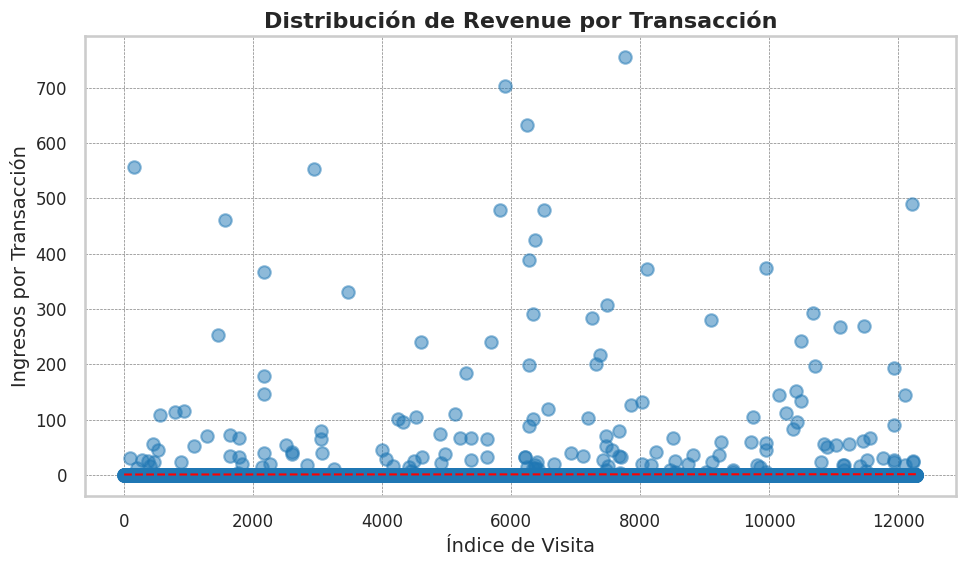

In [118]:

x = range(len(df_traffic['fullVisitorId']))
y = df_traffic['transactionRevenue']

plt.figure(figsize=(10, 6))

# Creando el gráfico de dispersión
plt.scatter(x, y, alpha=0.5)

# Añadir una línea de tendencia
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--", linewidth=1.5)  # Línea de tendencia en rojo y estilo discontinuo

# Mejoras visuales
plt.title('Distribución de Revenue por Transacción', fontsize=16, fontweight='bold')
plt.xlabel('Índice de Visita', fontsize=14)
plt.ylabel('Ingresos por Transacción', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')  # Añadir una cuadrícula para facilitar la lectura

# Mostrar el gráfico
plt.tight_layout()  # Ajustar automáticamente los parámetros del subplot
plt.show()

**Comportamiento de usuarios que presentaron consumos**

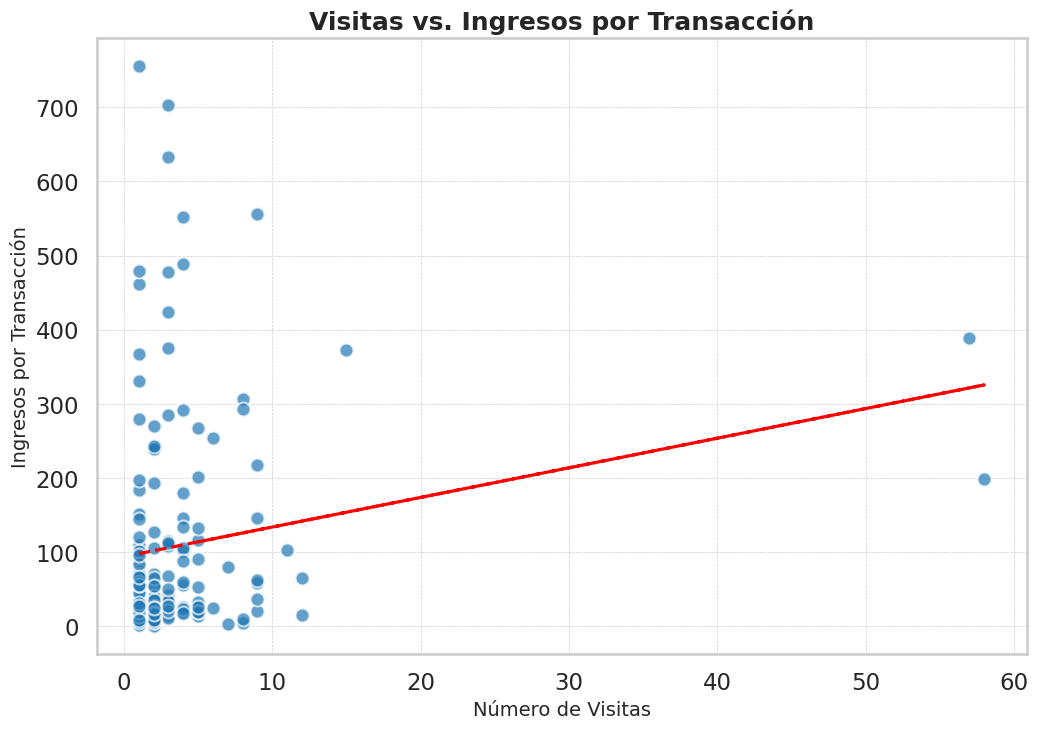

In [119]:

plt.figure(figsize=(12, 8))
plt.scatter(df_consumos['visitNumber'], df_consumos['transactionRevenue'], alpha=0.7, edgecolors='w', s=100)

# Línea de tendencia
z = np.polyfit(df_consumos['visitNumber'], df_consumos['transactionRevenue'], 1)
p = np.poly1d(z)
plt.plot(df_consumos['visitNumber'], p(df_consumos['visitNumber']), "r--")  # Línea de tendencia en rojo y estilo discontinuo

sns.set_style('whitegrid')
plt.title('Visitas vs. Ingresos por Transacción', fontsize=18, fontweight='bold')
plt.xlabel('Número de Visitas', fontsize=14)
plt.ylabel('Ingresos por Transacción', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

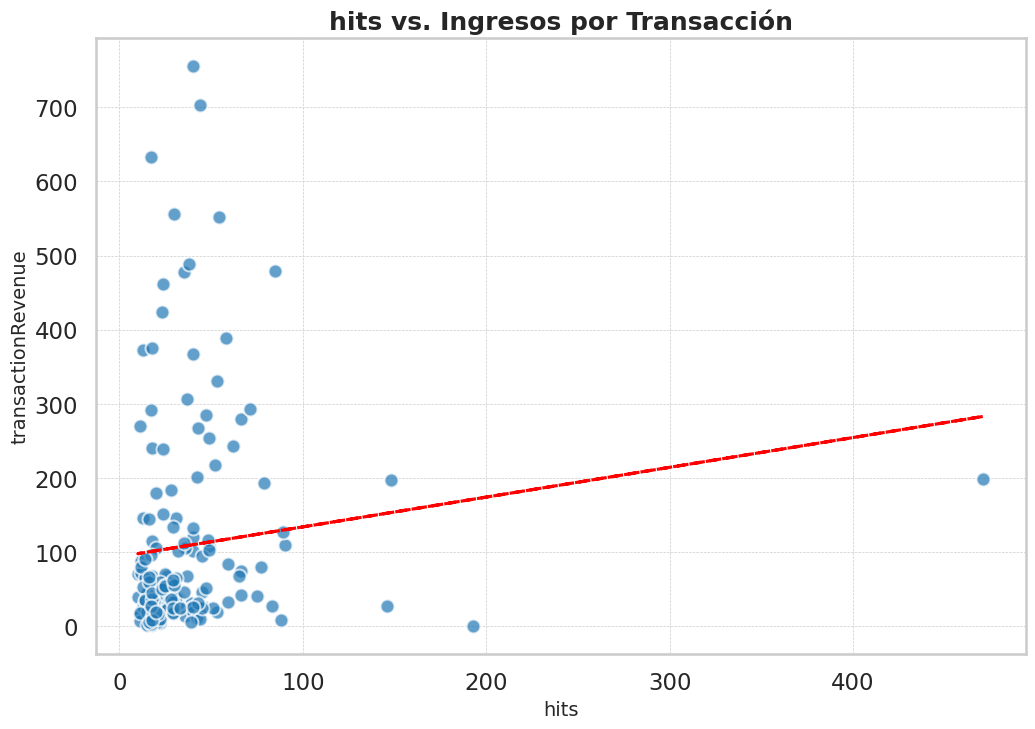

In [120]:
plt.figure(figsize=(12, 8))
plt.scatter(df_consumos['hits'], df_consumos['transactionRevenue'], alpha=0.7, edgecolors='w', s=100)

# Línea de tendencia
z = np.polyfit(df_consumos['hits'], df_consumos['transactionRevenue'], 1)
p = np.poly1d(z)
plt.plot(df_consumos['hits'], p(df_consumos['hits']), "r--")  # Línea de tendencia en rojo y estilo discontinuo

sns.set_style('whitegrid')
plt.title('hits vs. Ingresos por Transacción', fontsize=18, fontweight='bold')
plt.xlabel('hits', fontsize=14)
plt.ylabel('transactionRevenue', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

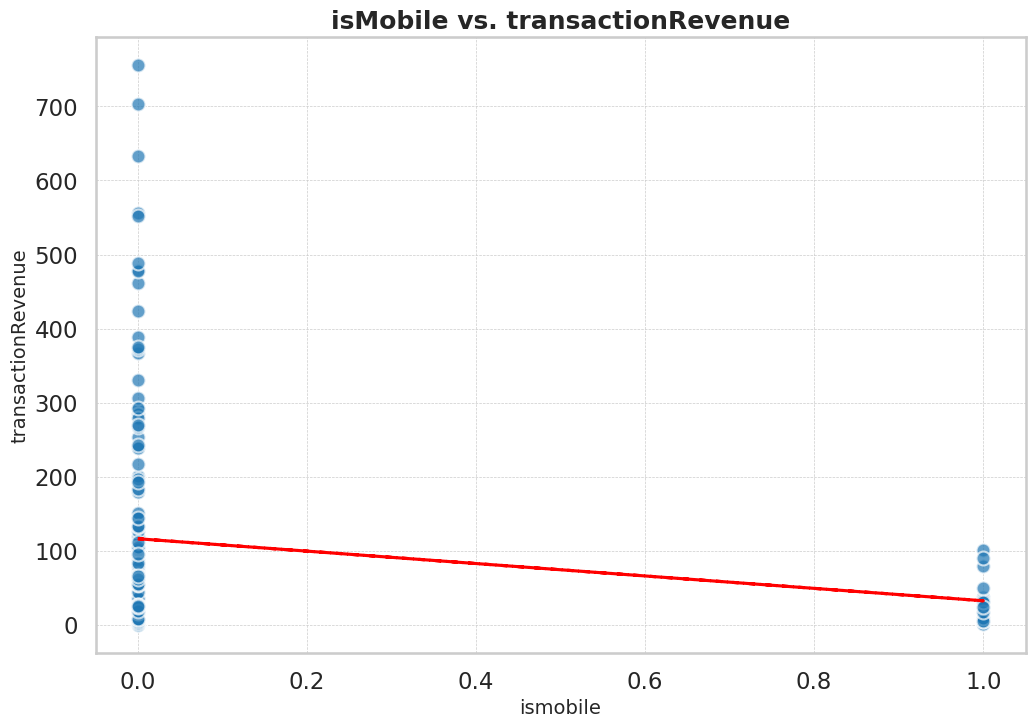

In [121]:
plt.figure(figsize=(12, 8))
plt.scatter(df_consumos['isMobile'], df_consumos['transactionRevenue'], alpha=0.7, edgecolors='w', s=100)

# Línea de tendencia
z = np.polyfit(df_consumos['isMobile'], df_consumos['transactionRevenue'], 1)
p = np.poly1d(z)
plt.plot(df_consumos['isMobile'], p(df_consumos['isMobile']), "r--")  # Línea de tendencia en rojo y estilo discontinuo

sns.set_style('whitegrid')
plt.title('isMobile vs. transactionRevenue', fontsize=18, fontweight='bold')
plt.xlabel('ismobile', fontsize=14)
plt.ylabel('transactionRevenue', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

# GRAFICOS PARA COMPRENDER MEJOR EL ENTORNO

# Tendencia en el tiempo

*   La observación de picos altos de consumo en fechas específicas sugiere una relación significativa entre ciertos eventos o temporadas y el incremento en la actividad de compra. Estos periodos, como la Navidad, viernes Negro, son conocidos por impulsar el consumo debido a las promociones, descuentos y la naturaleza misma de las festividades, que fomentan el gasto.

*   Para capturar y analizar el impacto de estos eventos en el comportamiento de compra, se podría considerar la creación de variables indicadoras (variables dummy) en los análisis de datos.

*   Incorporar estas variables en modelos de análisis puede mejorar significativamente la capacidad para entender y predecir patrones de consumo, permitiendo a las empresas ajustar sus estrategias de marketing, inventario, y promociones de manera más efectiva. Además, el análisis de estas tendencias temporales puede ofrecer insights valiosos sobre el comportamiento del consumidor, ayudando a identificar oportunidades para introducir nuevos productos o servicios en momentos clave para maximizar el engagement y las ventas.

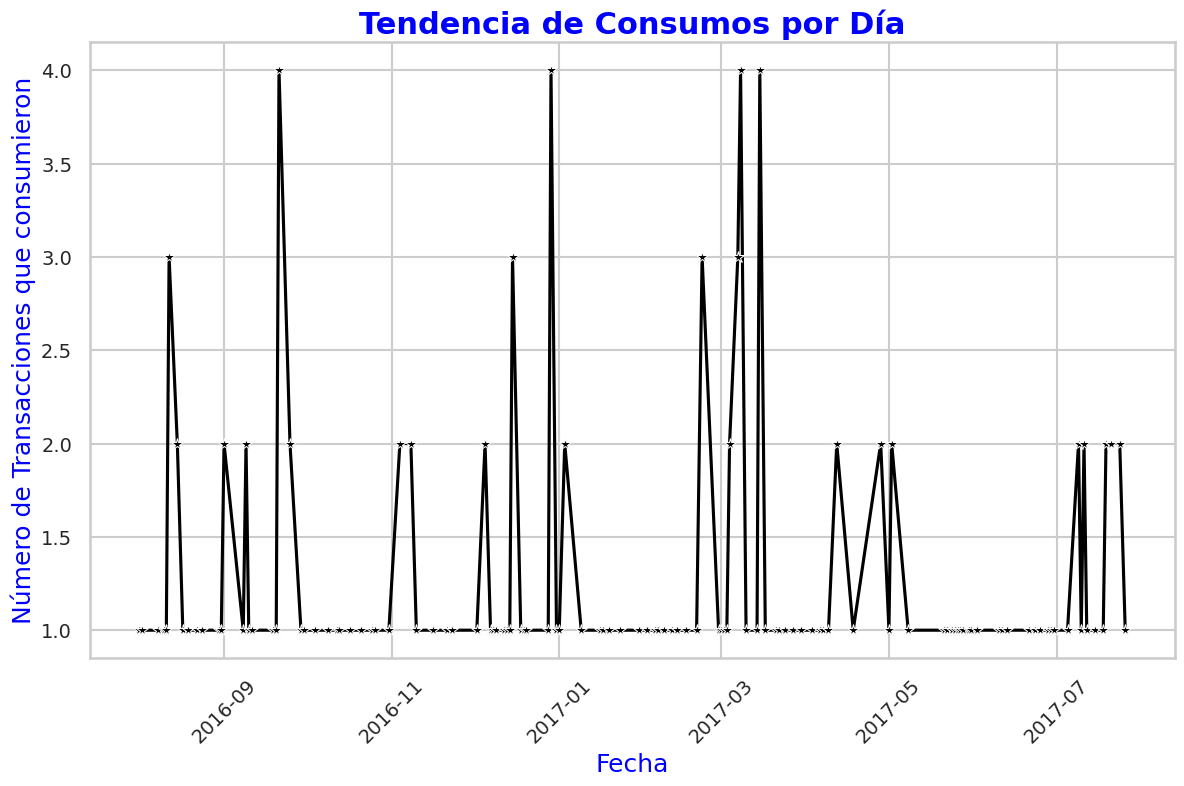

In [122]:

transacciones_por_dia = df_consumos.groupby('date').size()
plt.figure(figsize=(14, 8))
sns.lineplot(data=transacciones_por_dia, marker='*', linestyle='-', color='black')

sns.set_style("whitegrid")
plt.title('Tendencia de Consumos por Día', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Fecha', fontsize=18, color='blue')
plt.ylabel('Número de Transacciones que consumieron', fontsize=18, color='blue')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.show()

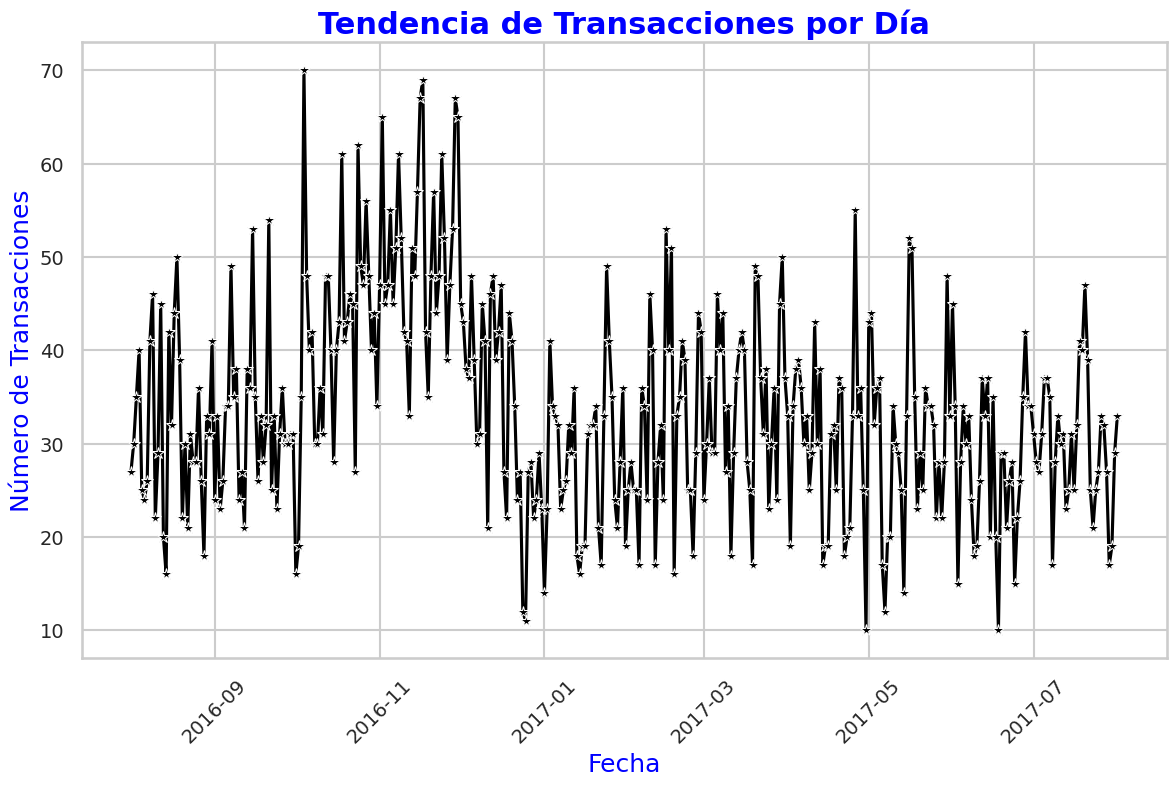

In [123]:
transacciones_por_dia = df_traffic.groupby('date').size()
plt.figure(figsize=(14, 8))
sns.lineplot(data=transacciones_por_dia, marker='*', linestyle='-', color='black')

sns.set_style("whitegrid")
plt.title('Tendencia de Transacciones por Día', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Fecha', fontsize=18, color='blue')
plt.ylabel('Número de Transacciones', fontsize=18, color='blue')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [124]:
## FECHAS CON MAS TRANSACCIONES

consumos_por_dia = df_traffic.groupby('date').size()
top_dias = consumos_por_dia.sort_values(ascending=False).head(30)
top_dias_df = top_dias.reset_index(name='Número de Consumos')
top_dias_df.columns = ['Fecha', 'total transacciones']
print(top_dias_df)

        Fecha  total transacciones
0  2016-10-04                   70
1  2016-11-17                   69
2  2016-11-29                   67
3  2016-11-16                   67
4  2016-11-02                   65
5  2016-11-30                   65
6  2016-10-24                   62
7  2016-11-08                   61
8  2016-10-18                   61
9  2016-11-24                   61
10 2016-11-15                   57
11 2016-11-21                   57
12 2016-10-27                   56
13 2016-11-05                   55
14 2017-04-26                   55
15 2016-09-21                   54
16 2016-11-28                   53
17 2017-02-15                   53
18 2016-09-15                   53
19 2016-11-09                   52
20 2016-11-25                   52
21 2017-05-16                   52
22 2017-05-17                   51
23 2017-02-17                   51
24 2016-11-07                   51
25 2016-11-13                   51
26 2016-08-18                   50
27 2017-03-30       

In [125]:
## FECHAS CON MAS CONSUMOS

pd.set_option('display.max_rows', None)


consumos_por_dia = df_consumos.groupby('date').size()
top_dias = consumos_por_dia.sort_values(ascending=False).head(20)
top_dias_df = top_dias.reset_index(name='Número de Consumos')
top_dias_df.columns = ['Fecha', 'total transacciones']
print(top_dias_df)

        Fecha  total transacciones
0  2016-12-29                    4
1  2016-09-21                    4
2  2017-03-15                    4
3  2017-03-08                    4
4  2016-08-12                    3
5  2016-12-15                    3
6  2017-02-22                    3
7  2017-03-07                    3
8  2016-11-08                    2
9  2016-09-09                    2
10 2016-12-05                    2
11 2017-04-28                    2
12 2017-04-12                    2
13 2016-11-04                    2
14 2017-01-03                    2
15 2016-09-25                    2
16 2016-09-01                    2
17 2017-07-11                    2
18 2017-07-24                    2
19 2017-07-21                    2


## Mes con mas consumos

La identificación de diciembre y marzo como los meses con mayores consumos, asociados a festividades significativas como el Año Nuevo y diversas celebraciones de la temporada primaveral, incluyendo el Día de San Patricio en Estados Unidos, sugiere una marcada influencia de estas fechas en el comportamiento de compra de los consumidores. Este patrón refleja cómo las tradiciones culturales y las festividades pueden motivar un aumento en las actividades de compra, posiblemente debido a la compra de regalos, preparativos para celebraciones, o aprovechamiento de ofertas y promociones especiales.

Para capturar el efecto de estas temporadas festivas en las transacciones, se creara una variable categórica que refleje los períodos de alta actividad comercial.

Incluir esta variable en análisis de datos permitirá realizar comparaciones más precisas sobre el volumen de transacciones entre diferentes períodos, ayudando a entender mejor el impacto de las festividades en el consumo. Además, esta información puede ser valiosa para la planificación estratégica de negocios, permitiendo a las empresas anticiparse a los picos de demanda mediante la gestión adecuada de inventarios, la optimización de campañas de marketing y la preparación de ofertas y promociones que se alineen con el interés y comportamiento de compra de los consumidores durante estas temporadas clave.

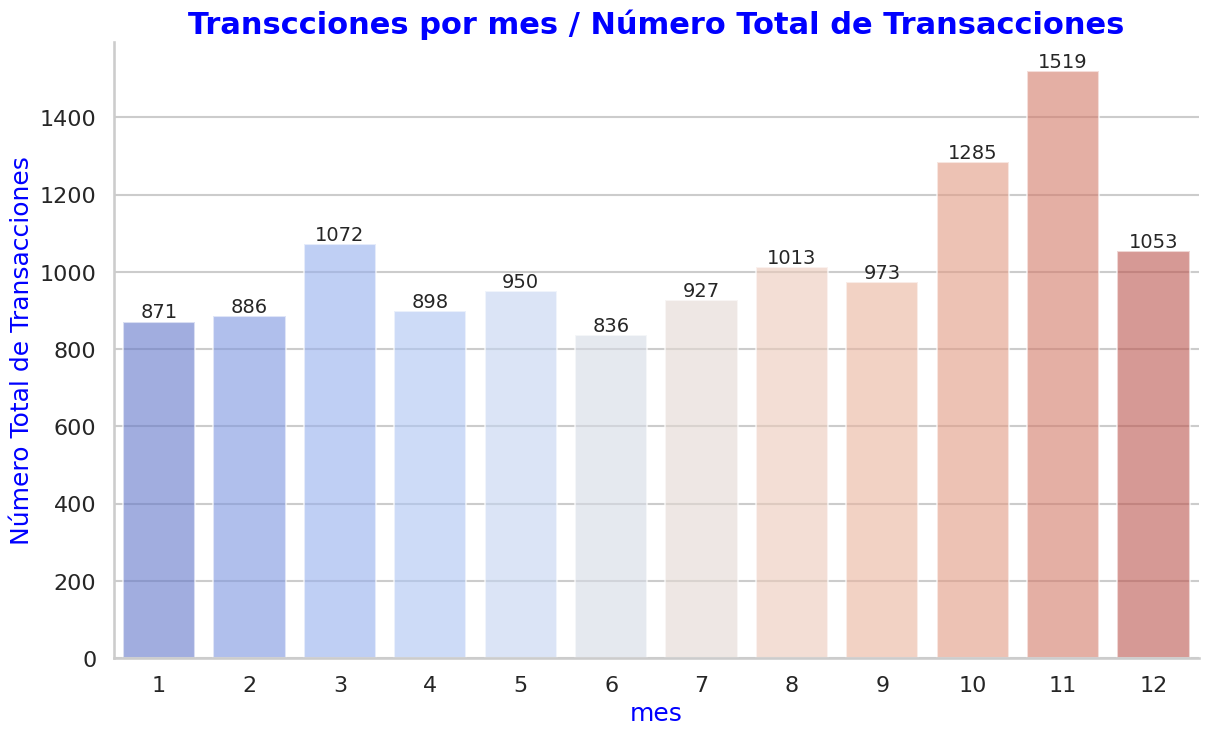

In [126]:
# Comportamiento mes / Número Total de Transacciones
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='mes', y='hora', data=df_traffic, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Transcciones por mes / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('mes', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_traffic['mes'].value_counts().sort_index()
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=14)
plt.show()

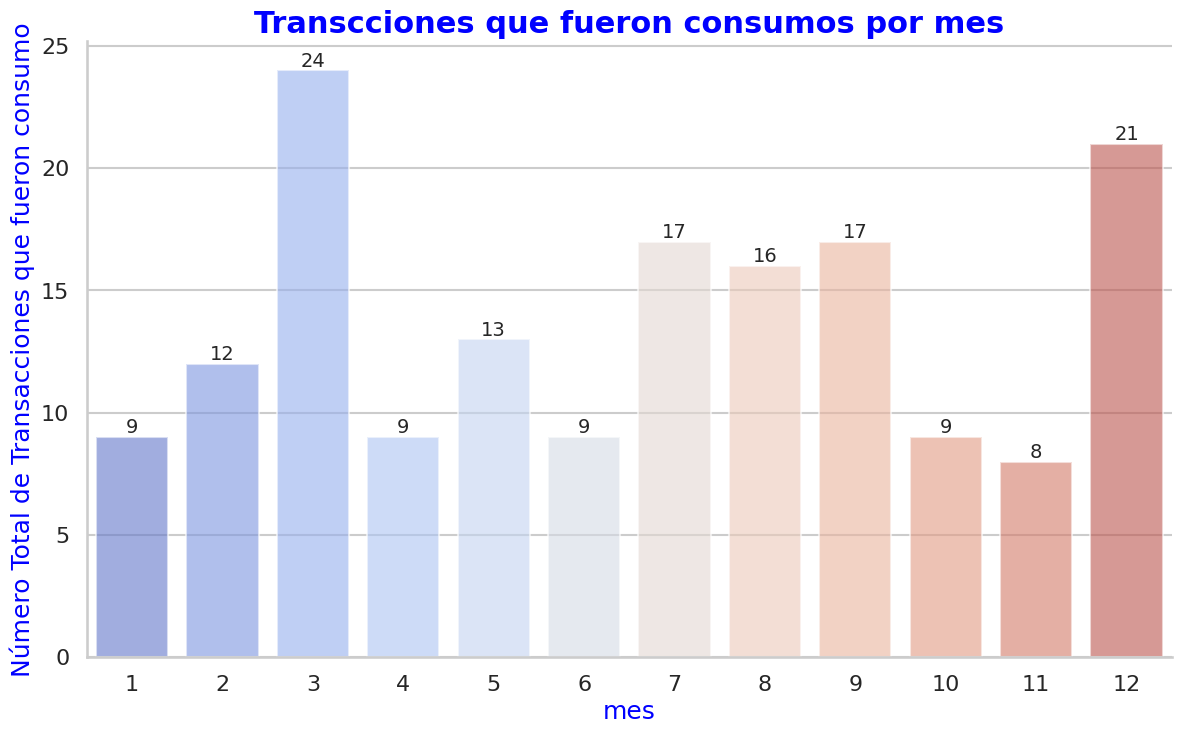

In [127]:
# Comportamiento mes / Numero de consumos por mes
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='mes', y='hora', data=df_consumos, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Transcciones que fueron consumos por mes', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('mes', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones que fueron consumo', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_consumos['mes'].value_counts().sort_index()
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=14)
plt.show()

In [128]:
## MES CON MAS CONSUMOS
consumos_por_dia = df_traffic.groupby('mes').size()
top_dias = consumos_por_dia.sort_values(ascending=False).head(12)
top_dias_df = top_dias.reset_index(name='Número de Consumos')
top_dias_df.columns = ['mes', 'total transacciones']
print(top_dias_df)

    mes  total transacciones
0    11                 1519
1    10                 1285
2     3                 1072
3    12                 1053
4     8                 1013
5     9                  973
6     5                  950
7     7                  927
8     4                  898
9     2                  886
10    1                  871
11    6                  836


In [129]:
df_dias_transacciones = df_traffic.groupby('date').size()
df_dias_consumos = df_consumos.groupby('date').size()

In [130]:
df_dias_transacciones.head(5)

date
2016-08-01    27
2016-08-02    30
2016-08-03    35
2016-08-04    40
2016-08-05    25
dtype: int64

In [131]:
df_dias_consumos.head(20)

date
2016-08-01    1
2016-08-02    1
2016-08-08    1
2016-08-10    1
2016-08-11    1
2016-08-12    3
2016-08-15    2
2016-08-17    1
2016-08-19    1
2016-08-22    1
2016-08-24    1
2016-08-30    1
2016-08-31    1
2016-09-01    2
2016-09-08    1
2016-09-09    2
2016-09-10    1
2016-09-11    1
2016-09-19    1
2016-09-20    1
dtype: int64

# Analisis por Hora

El análisis de datos de consumo por hora revela patrones significativos en los hábitos de compra de los consumidores, ofreciendo insights sobre los momentos del día en que la actividad de compra es más intensa. Este tipo de análisis es particularmente útil para ajustar estrategias de marketing, optimización de la experiencia de usuario en plataformas de e-commerce, y para la planificación de recursos en operaciones digitales, de acuerdo a nuestra informacion recopilada se identifica que desde las 12:00 p hasta las 24:00 pm son las horas de mayor actividad.


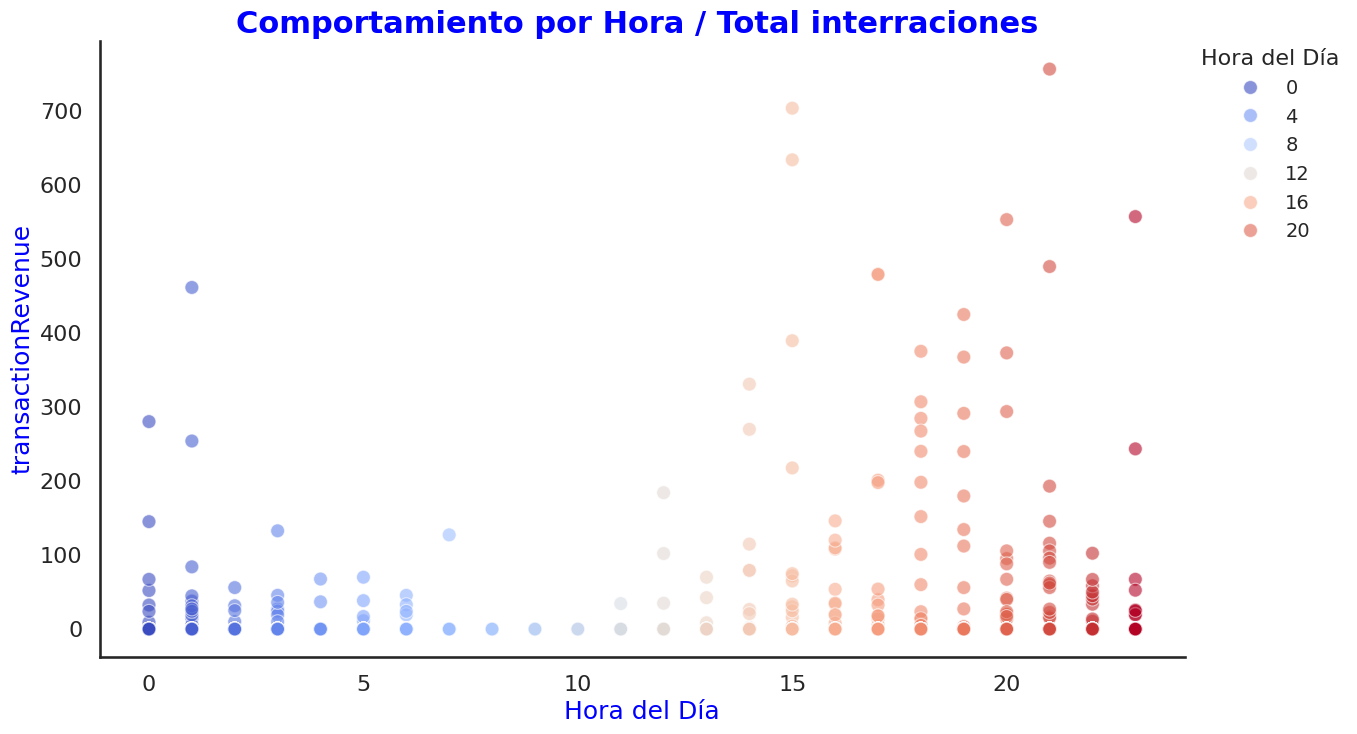

In [132]:
# Se Puede observar que el mayot flujo transacciones es en horas de la tarde
## Comportamiento por Hora de transacciones totales

sns.set_style("white")
sns.set_context("talk")

plt.figure(figsize=(14, 8))

scatter = sns.scatterplot(x='hora', y='transactionRevenue', data=df_traffic,
                          alpha=0.6, edgecolor='w', s=100,
                          hue='hora', palette='coolwarm')
sns.despine()
plt.title('Comportamiento por Hora / Total interraciones ', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Hora del Día', fontsize=18, color='blue')
plt.ylabel('transactionRevenue', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

plt.legend(title='Hora del Día', title_fontsize='16', fontsize='14', loc='upper right',
           bbox_to_anchor=(1.15, 1), borderaxespad=0., frameon=False)
plt.show()

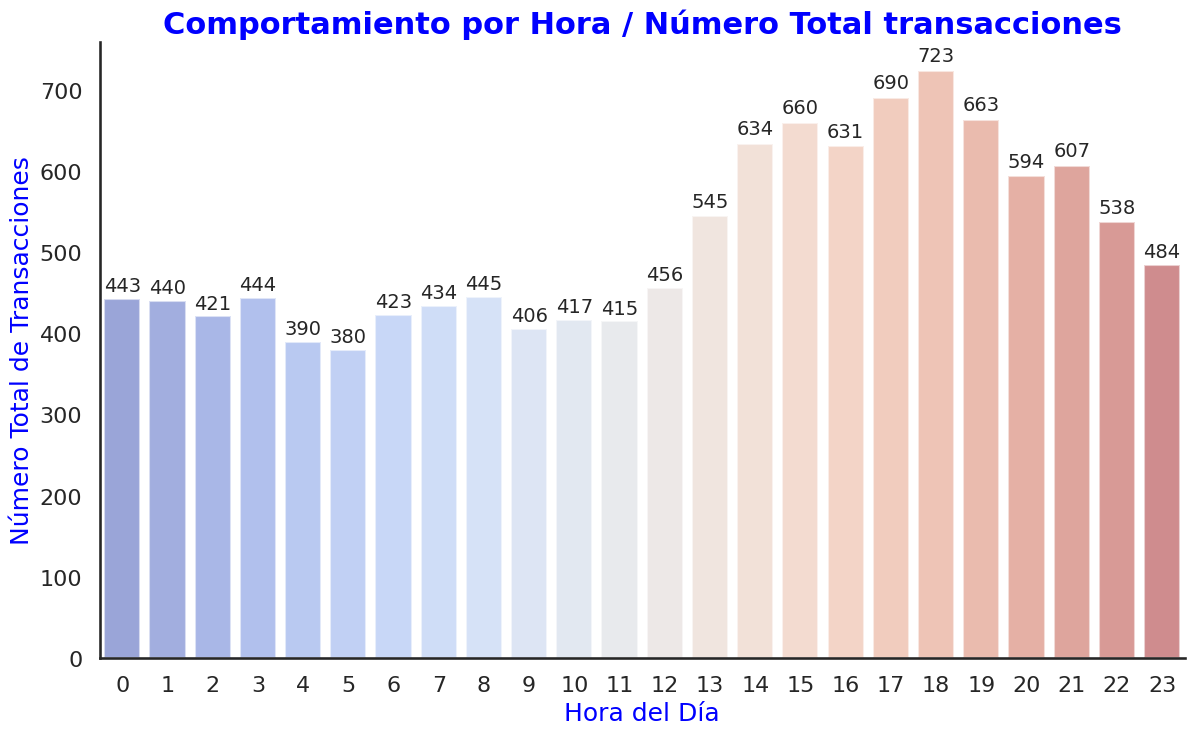

In [133]:
# Comportamiento por Hora / Número Total de Transacciones

plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='hora', y='hora', data=df_traffic, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento por Hora / Número Total transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Hora del Día', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_traffic['hora'].value_counts().sort_index()
for index, bar in enumerate(bar_plot.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., 1.01*height,
             '{}'.format(conteos_por_hora[index]), ha='center', va='bottom', fontsize=14)

plt.show()

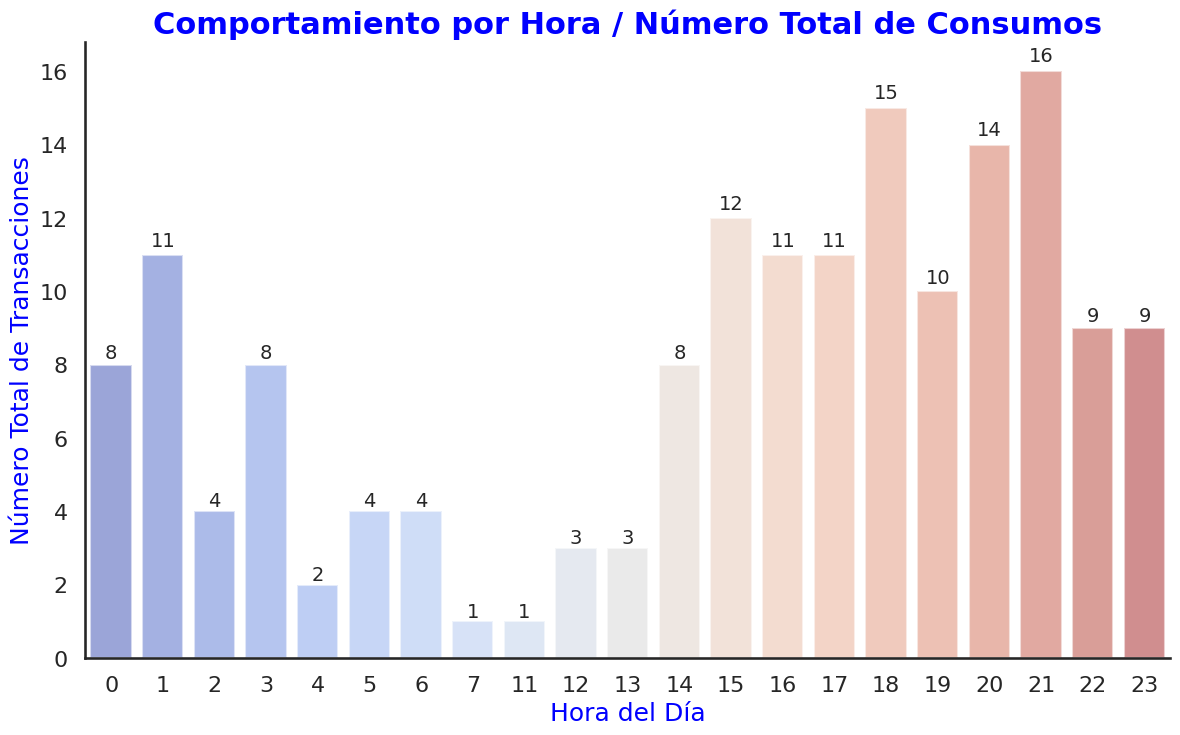

In [134]:
# Comportamiento mes / Número Total de Transacciones

# Calculamos el número total de consumos por hora directamente desde 'df_consumos'
conteos_por_hora_df_consumos = df_consumos['hora'].value_counts().sort_index()

plt.figure(figsize=(14, 8))

bar_plot = sns.barplot(x='hora', y='conteo', data=df_consumos.assign(conteo=1), estimator=sum,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento por Hora / Número Total de Consumos', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Hora del Día', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

for index, bar in enumerate(bar_plot.patches):
    height = bar.get_height()
    # Aseguramos que el texto se coloque basado en el conteo correcto de 'df_consumos'
    label = conteos_por_hora_df_consumos.iloc[index] if index < len(conteos_por_hora_df_consumos) else 0
    plt.text(bar.get_x() + bar.get_width() / 2., 1.01*height,
             '{}'.format(label), ha='center', va='bottom', fontsize=14)

plt.show()

## Se agrupa en cuatro horarios, para poder identificar donde se presentan mas las transacciones y consumos:

La agrupación de las transacciones y consumos en cuatro horarios distintos es una estrategia eficaz para simplificar el análisis de datos y obtener insights más claros sobre los patrones de compra. Si las compras se presentan más en los horarios de la tarde, desde las 12:00 pm hasta las 24:00 pm, esto sugiere una tendencia clara en el comportamiento de los consumidores, preferentemente orientada hacia las actividades de compra en la segunda mitad del día.

Para este tipo de análisis, se divide el día en los siguientes cuatro intervalos:

*   Mañana (6:00 am - 12:00 pm): Este horario captura las actividades de compra temprano en el día, que pueden incluir compras impulsadas por necesidades de último minuto o la realización de pedidos planificados previamente.

*   Tarde (12:00 pm - 18:00 pm): Este intervalo cubre las horas después del mediodía hasta el comienzo de la noche. Este periodo parece ser crítico para las transacciones y consumos, posiblemente debido a las pausas para el almuerzo o el tiempo libre que las personas pueden tener para realizar compras en línea o físicas.

*   Noche (18:00 pm - 24:00 pm): Este periodo abarca las horas de la tarde hasta la medianoche. Las compras en este horario podrían estar influenciadas por la conclusión de la jornada laboral, compras de última hora, o actividades de ocio que incluyen compras en línea.

*   Madrugada (0:00 am - 6:00 am): Aunque este intervalo suele tener menos actividad de compra en comparación con otros momentos del día, es importante monitorearlo para identificar comportamientos de nicho o tendencias emergentes, como compras impulsivas nocturnas o compras internacionales en zonas horarias diferentes.

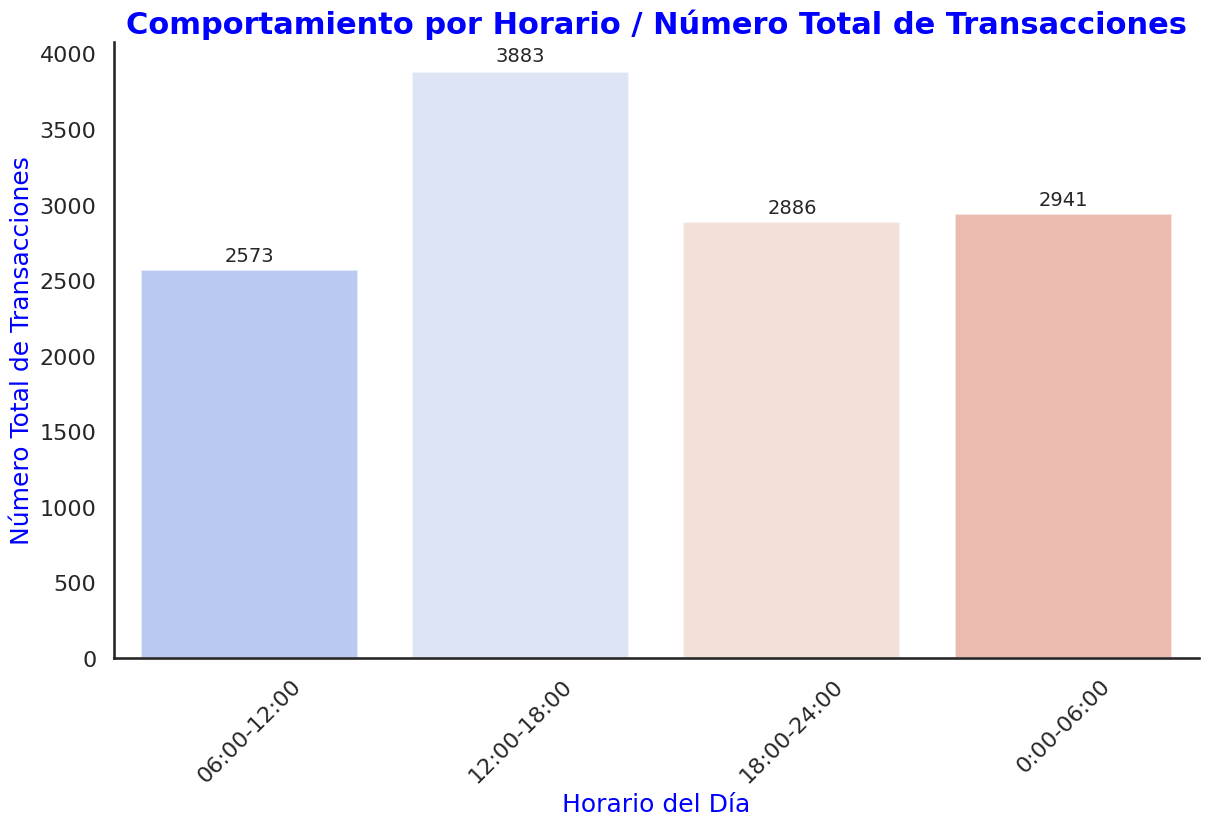

In [135]:
# Comportamiento horario / Número Total de Transacciones

plt.figure(figsize=(14, 8))
df_traffic['horario'] = pd.Categorical(df_traffic['horario'],
                                       categories=["06:00-12:00", "12:00-18:00", "18:00-24:00", "0:00-06:00"],
                                       ordered=True)

# Orden definido de las categorías para las barras
bar_plot = sns.barplot(x='horario', y='hora', data=df_traffic, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento por Horario / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Horario del Día', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

# Recalculando conteos_por_hora para asegurar el orden correcto
conteos_por_hora = df_traffic['horario'].value_counts().sort_index()

# Usando el índice correcto para cada etiqueta
for bar, value in zip(bar_plot.patches, conteos_por_hora.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., 1.01*height,
             f'{value}', ha='center', va='bottom', fontsize=14)

plt.show()

In [136]:
conteo_horario = df_traffic['horario'].unique()
conteo_horario

['06:00-12:00', '12:00-18:00', '18:00-24:00', '0:00-06:00']
Categories (4, object): ['06:00-12:00' < '12:00-18:00' < '18:00-24:00' < '0:00-06:00']

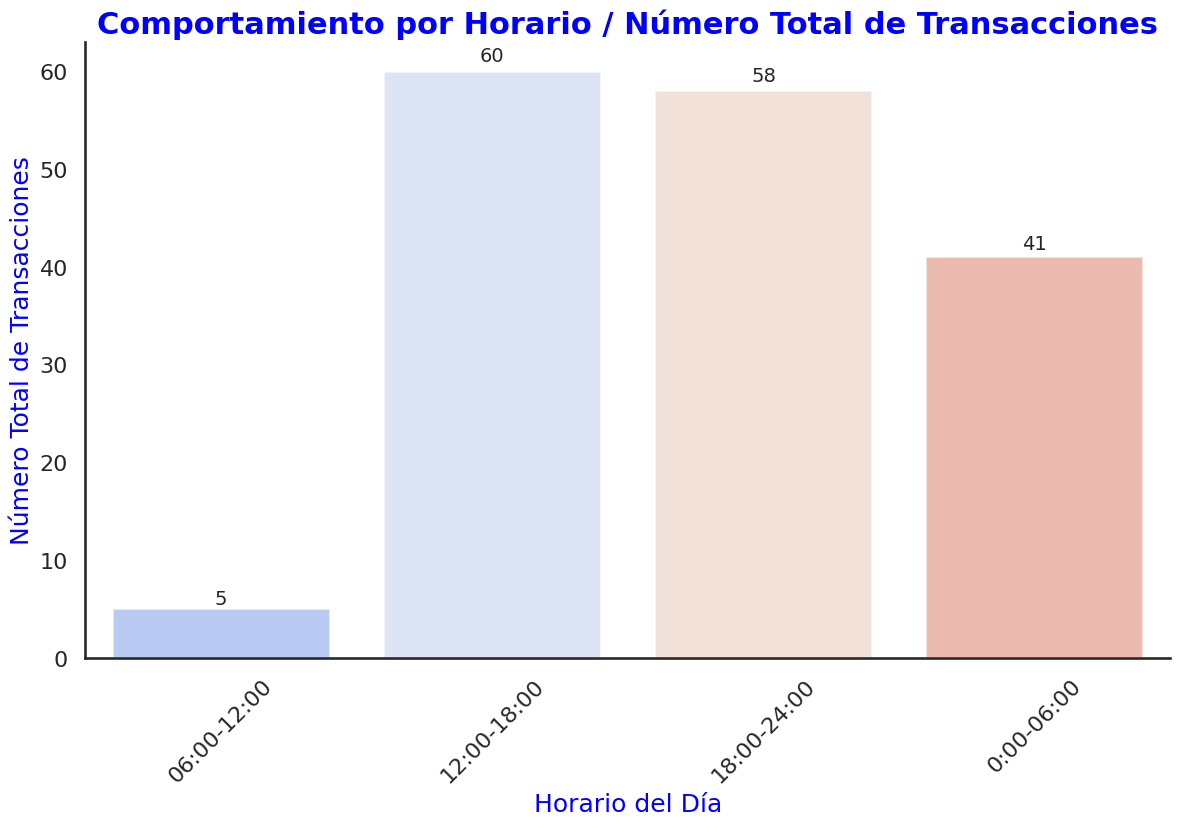

In [137]:
# Comportamiento por horario / Número Total de Transacciones CONSUMO

plt.figure(figsize=(14, 8))
df_consumos['horario'] = pd.Categorical(df_consumos['horario'],
                                       categories=["06:00-12:00", "12:00-18:00", "18:00-24:00", "0:00-06:00"],
                                       ordered=True)

# Orden definido de las categorías para las barras
bar_plot = sns.barplot(x='horario', y='hora', data=df_consumos, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento por Horario / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Horario del Día', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

# Recalculando conteos_por_hora para asegurar el orden correcto
conteos_por_hora = df_consumos['horario'].value_counts().sort_index()

# Usando el índice correcto para cada etiqueta
for bar, value in zip(bar_plot.patches, conteos_por_hora.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., 1.01*height,
             f'{value}', ha='center', va='bottom', fontsize=14)

plt.show()

# Análisis de Días de la Semana en Transaccionalidad y Consumo


*   Esto indica que el martes y el miércoles son los días de mayor actividad en términos de número total de transacciones, destacándose como los momentos de la semana con mayor volumen de operaciones comerciales.

*   A pesar de que el martes tiene un alto volumen de transacciones, el análisis revela que el miércoles, seguido por el lunes, son los días donde se presentan más consumos. Esto sugiere que, aunque el martes sea significativo en cuanto a la cantidad de transacciones, el miércoles y el lunes son más relevantes en términos de la cantidad de consumos, reflejando posiblemente una mayor diversidad de compras realizadas o una mayor participación de consumidores activos en estos días.

*   Este análisis proporciona insights valiosos para la toma de decisiones en varios ámbitos del negocio:

*   Diseñar campañas de marketing dirigidas específicamente para los lunes y miércoles, con el objetivo de captar la atención de los consumidores en los días de mayor actividad de compra. Esto puede incluir ofertas especiales, descuentos, o promociones temáticas que incentiven aún más el consumo.

*   Asegurar que el inventario esté óptimamente preparado para satisfacer la demanda de los consumidores los lunes y miércoles, ajustando los niveles de stock basándose en los patrones de consumo observados.

*   Alinear los recursos de operaciones, logística, y soporte al cliente para asegurar una experiencia de compra fluida durante los picos de actividad, especialmente en los días identificados como de mayor consumo.

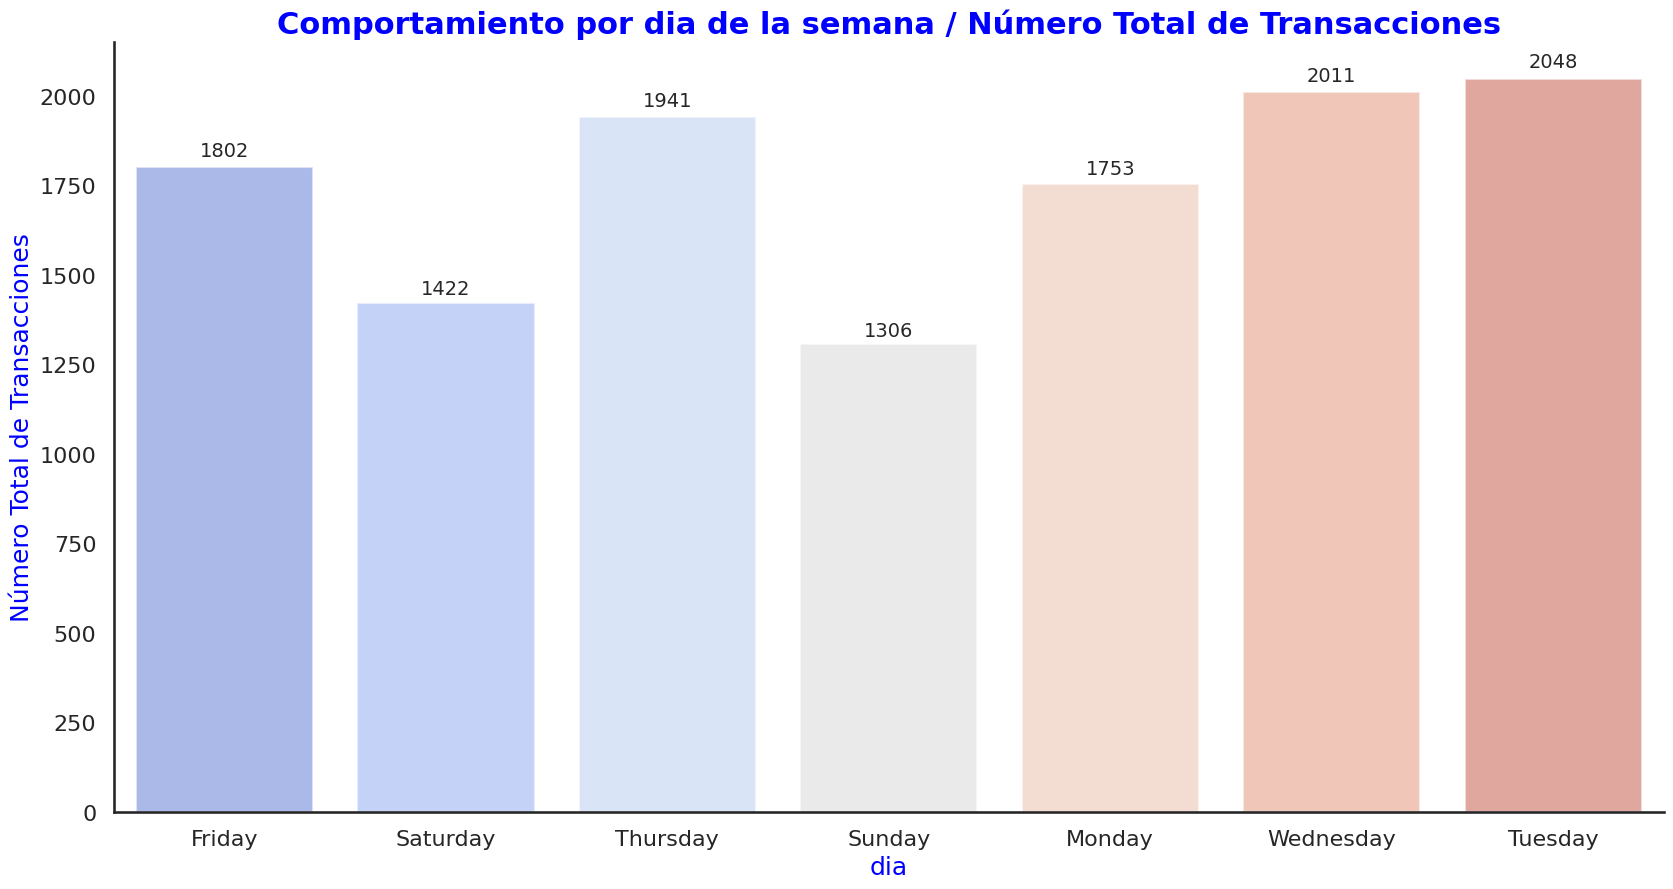

In [138]:
# Comportamiento dia de la semana / Número Total de Transacciones
plt.figure(figsize=(20, 10))


bar_plot = sns.barplot(x='dia_semana_nombre', y='hora', data=df_traffic, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento por dia de la semana / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('dia', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)


conteos_por_dia_semana = df_traffic['dia_semana_nombre'].value_counts().sort_index()

for bar in bar_plot.patches:
    day = bar.get_x() + bar.get_width() / 2.
    day_label = bar_plot.get_xticklabels()[int(day)].get_text()
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., 1.01*height,
             '{}'.format(conteos_por_dia_semana[day_label]), ha='center', va='bottom', fontsize=14)

plt.show()

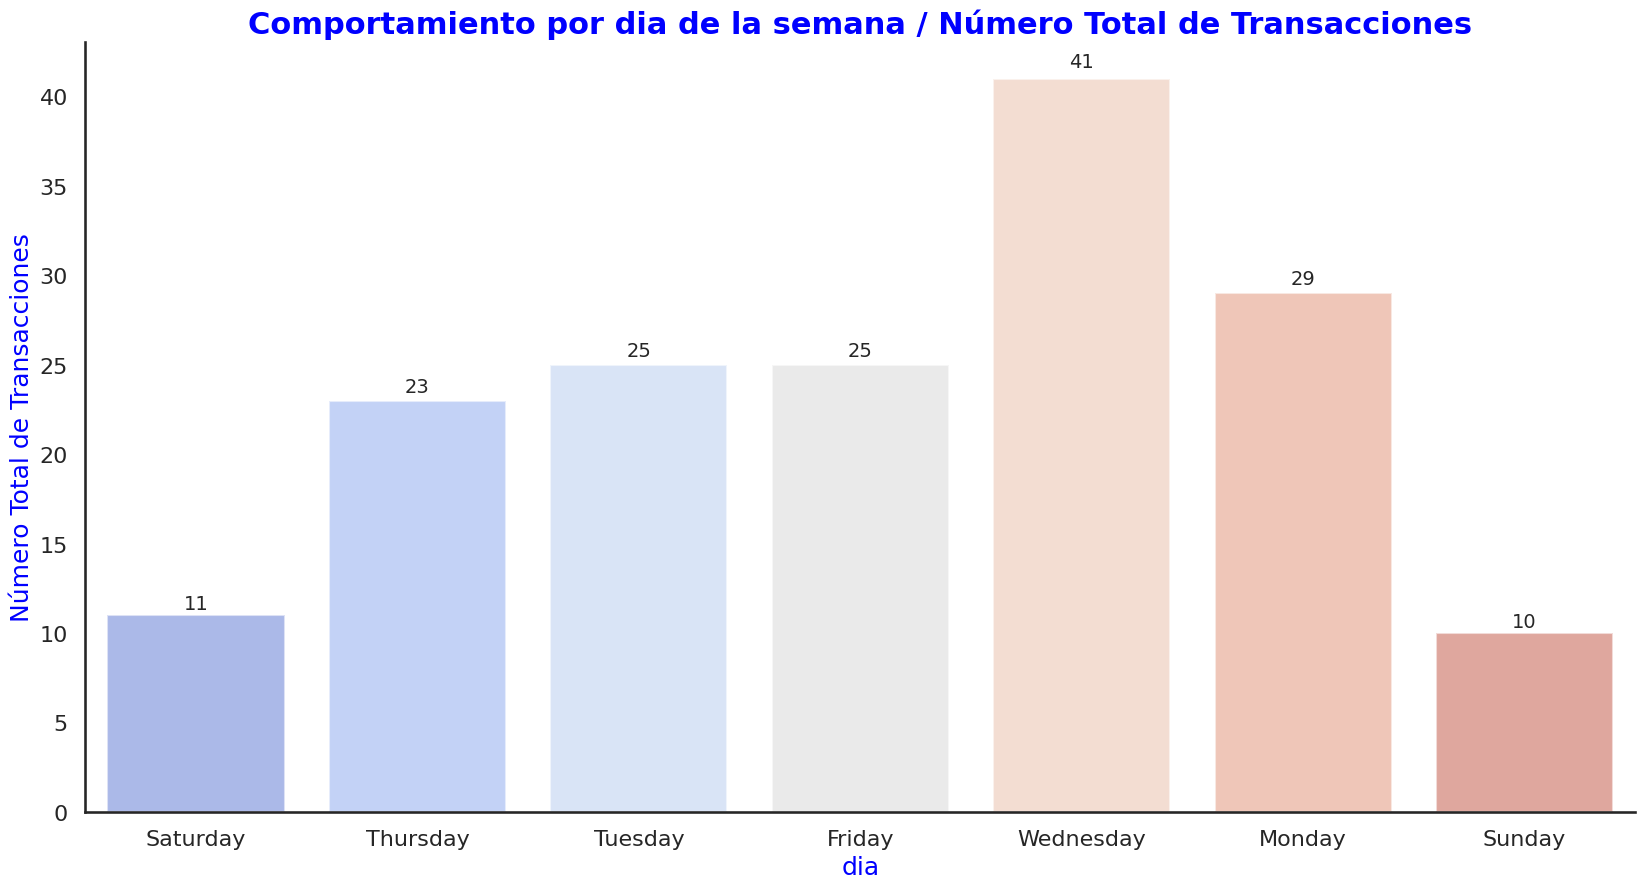

In [139]:
# Comportamiento por  dia / Número Total de Transacciones CONSUMO

plt.figure(figsize=(20, 10))


bar_plot = sns.barplot(x='dia_semana_nombre', y='hora', data=df_consumos, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento por dia de la semana / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('dia', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)


conteos_por_dia_semana = df_consumos['dia_semana_nombre'].value_counts().sort_index()

for bar in bar_plot.patches:
    day = bar.get_x() + bar.get_width() / 2.
    day_label = bar_plot.get_xticklabels()[int(day)].get_text()
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., 1.01*height,
             '{}'.format(conteos_por_dia_semana[day_label]), ha='center', va='bottom', fontsize=14)

plt.show()

# Recurrecenia de los usuarios


El análisis de la recurrencia de los usuarios, especialmente aquellos que efectúan compras, ofrece insights valiosos sobre el comportamiento de compra y la eficacia de las estrategias de marketing digital. Si se observa que una gran parte de los usuarios realiza solo una compra (1 recurrencia).

Interpretación del Comportamiento de Usuario

*   Decisión de Compra Preestablecida: El hecho de que muchos usuarios compren con solo una recurrencia puede indicar que llegan al sitio con una decisión de compra ya tomada. Esto sugiere que la influencia que lleva a la decisión de compra ocurre fuera de la plataforma de e-commerce.

*   Los usuarios pueden estar siendo influenciados por publicidad o contenido en otras plataformas antes de visitar la página de compra. Esto subraya la importancia de tener una presencia y estrategia de marketing integrada en múltiples canales.

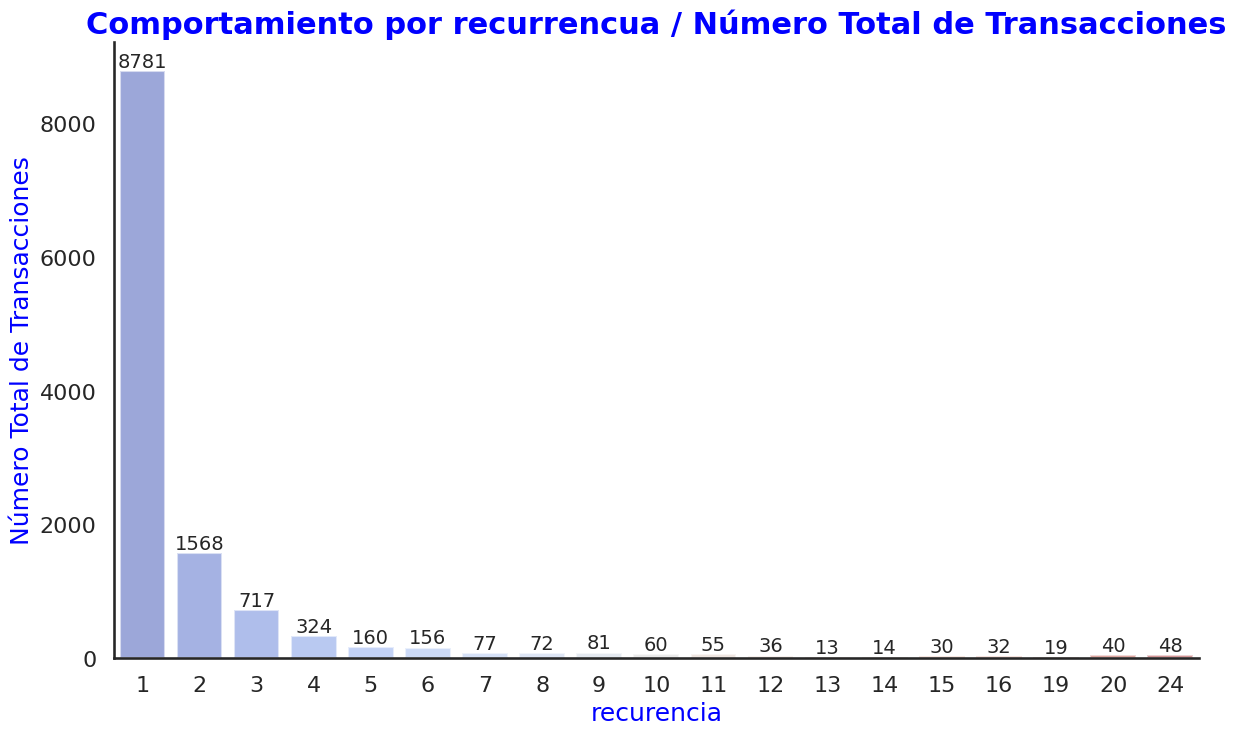

In [140]:
# Comportamiento horario / Número Total de Transacciones
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='recurrencia', y='hora', data=df_traffic, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento por recurrencua / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('recurencia', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_traffic['recurrencia'].value_counts().sort_index()
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=14)
plt.show()

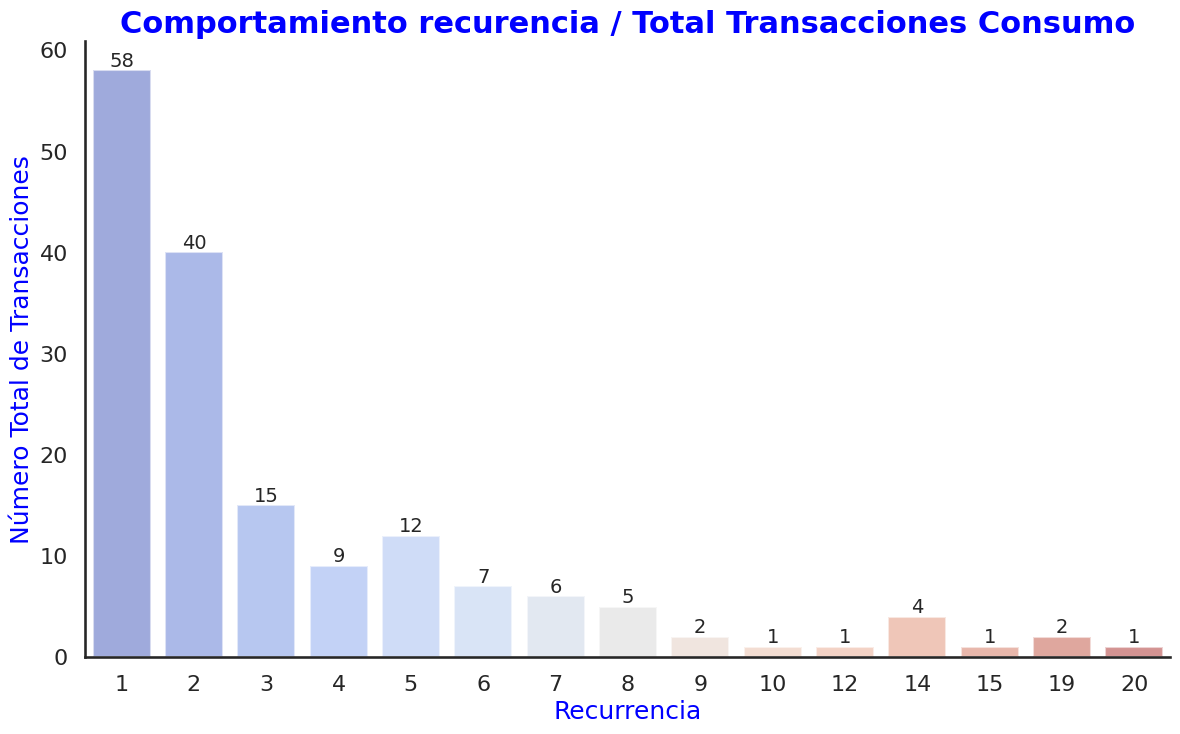

In [141]:
# Comportamiento por recurencia/ Número Total de Transacciones CONSUMO
plt.figure(figsize=(14, 8))

bar_plot = sns.barplot(x='recurrencia', y='hora', data=df_consumos, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento recurencia / Total Transacciones Consumo', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Recurrencia', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_consumos.groupby('recurrencia').size()
for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}',
             ha='center', va='bottom', fontsize=14)
plt.show()

# ANALISIS POR PAISES

Estados Unidos representa el mercado principal para los consumos. Esto podría deberse a varios factores, incluyendo la accesibilidad del sitio web en este país, la relevancia de los productos o servicios ofrecidos para este público, y la efectividad de las estrategias de marketing dirigidas a esta audiencia.

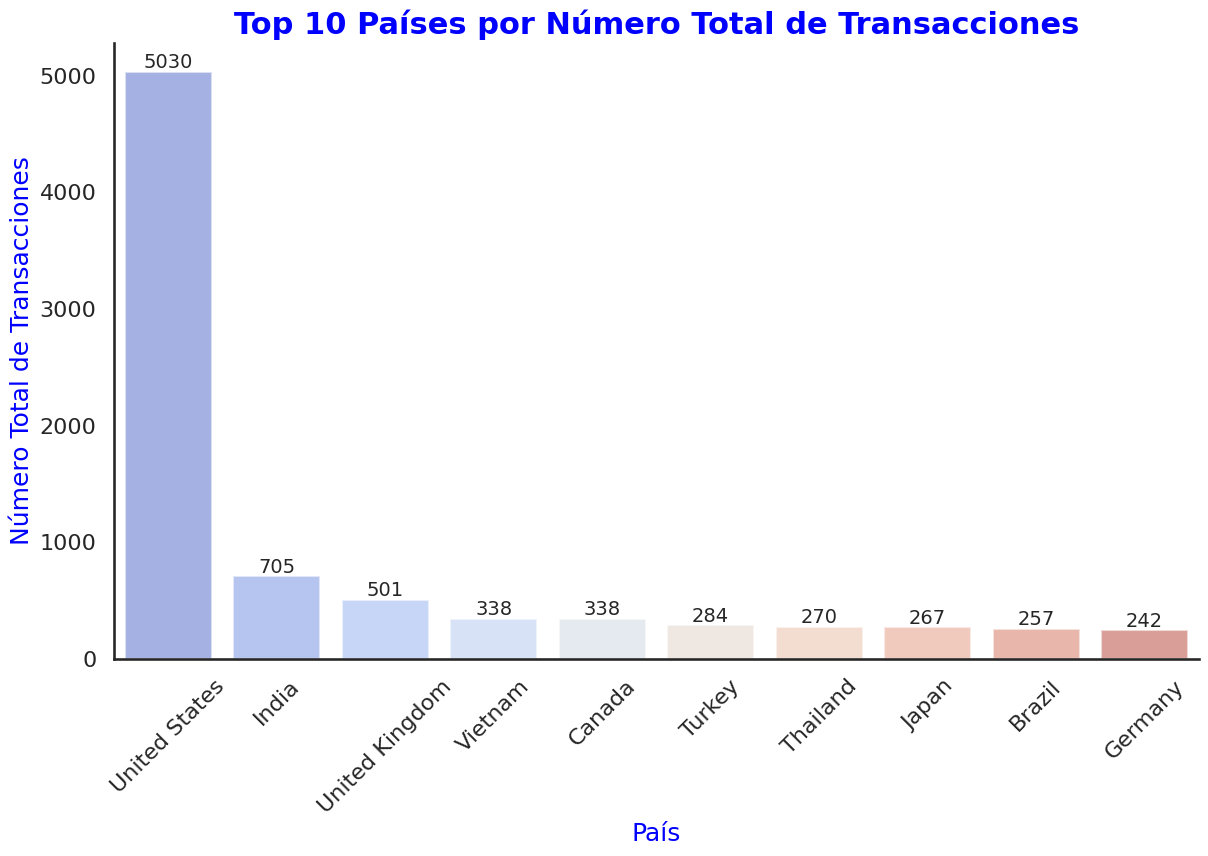

In [142]:
top_10_paises = df_traffic['country'].value_counts().nlargest(10).index

df_top_10 = df_traffic[df_traffic['country'].isin(top_10_paises)]
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='country', y='hora', data=df_top_10, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w', order=top_10_paises)

sns.despine()
plt.title('Top 10 Países por Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('País', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

conteos_por_pais = df_top_10['country'].value_counts().reindex(top_10_paises)

for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=14)

plt.show()

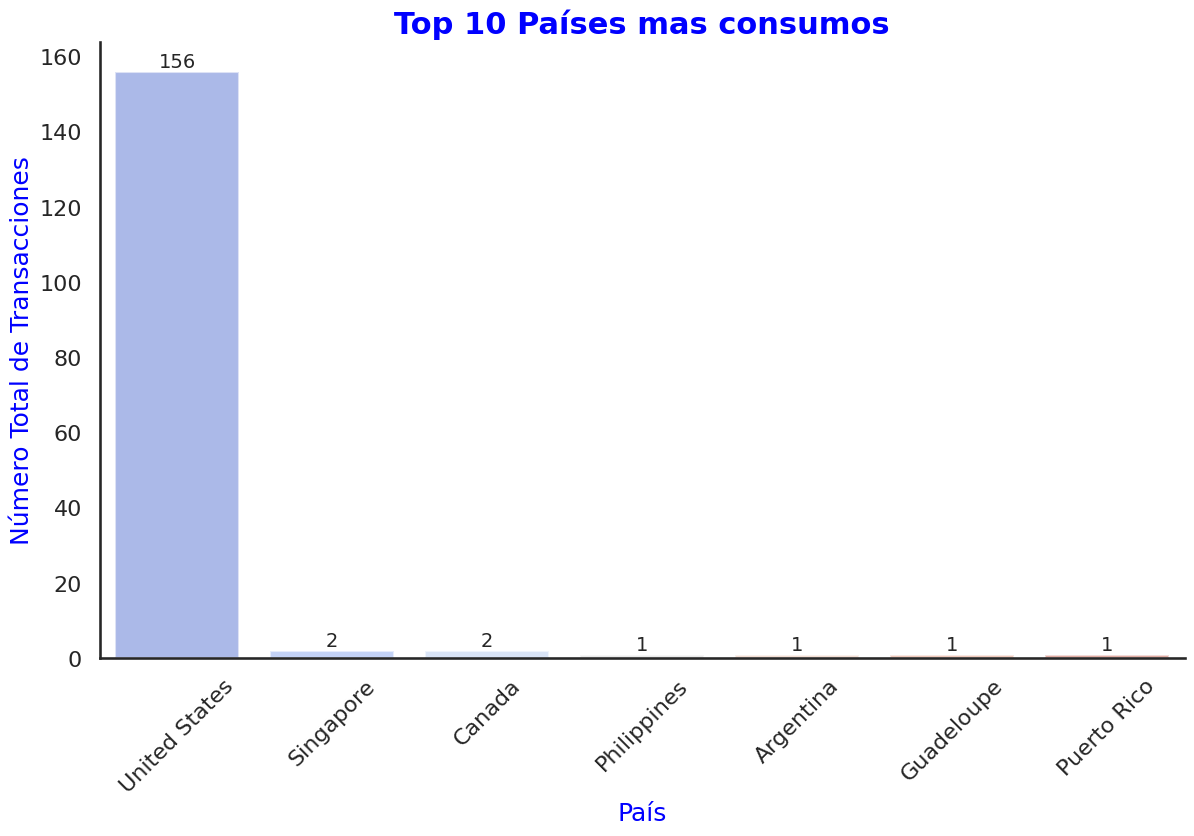

In [143]:
top_10_paises = df_consumos['country'].value_counts().nlargest(10).index

df_top_10 = df_consumos[df_consumos['country'].isin(top_10_paises)]
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='country', y='hora', data=df_top_10, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w', order=top_10_paises)

sns.despine()
plt.title('Top 10 Países mas consumos', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('País', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

conteos_por_pais = df_top_10['country'].value_counts().reindex(top_10_paises)

for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=14)

plt.show()

# ANALSIS RESTO DE VARIABLES

El hallazgo de que existe una mayor incidencia de consumos desde sistemas operativos Macintosh ofrece insights importantes sobre el perfil tecnológico y las preferencias de los consumidores

*   Los usuarios de Macintosh suelen asociarse con ciertos perfiles demográficos y psicográficos, como profesionales creativos, individuos con un poder adquisitivo más alto y usuarios que valoran mucho la experiencia de usuario y el diseño. Esta tendencia podría indicar ue los clientes se alinea con estos perfiles.

*   La marcada preferencia por los equipos de escritorio sobre los dispositivos móviles para realizar compras online ofrece una oportunidad valiosa para optimizar la experiencia de usuario y las estrategias de marketing en ambos tipos de plataformas. Entender las necesidades y preferencias de los usuarios es clave para aumentar la satisfacción del cliente, mejorar las tasas de conversión y adaptar el negocio a las tendencias de comportamiento digital. Aunque la tendencia actual favorezca a los dispositivos de escritorio, es importante no descuidar la experiencia móvil, dado el crecimiento constante del comercio electrónico móvil y el cambio en los hábitos de consumo.

*   El comportamiento de los consumidores podría haber evolucionado después de la pandemia del COVID-19. La pandemia ha acelerado la adopción digital y modificado significativamente los hábitos de compra, incluida la preferencia por dispositivos y sistemas operativos, así como la manera en que los consumidores interactúan con las plataformas de e-commerce.

Posibles Cambios en el Comportamiento del Consumidor Post-Pandemia

*   Aumento en la Compra Móvil: Durante y después de la pandemia, es probable que se haya observado un aumento en la utilización de dispositivos móviles para realizar compras, dada la necesidad de accesibilidad y la mayor familiaridad de los usuarios con las tecnologías móviles.

*   Cambio en el Perfil de Consumidores de Macintosh: Aunque los usuarios de Macintosh históricamente han tenido ciertos perfiles demográficos y psicográficos, la expansión del teletrabajo y los cambios en el mercado laboral podrían haber diversificado este perfil.

*   Nueva Valoración de la Experiencia de Usuario: La pandemia ha puesto de relieve la importancia de una experiencia de usuario fluida, segura y cómoda, tanto en dispositivos móviles como de escritorio, adaptándose a las nuevas expectativas de los consumidores.

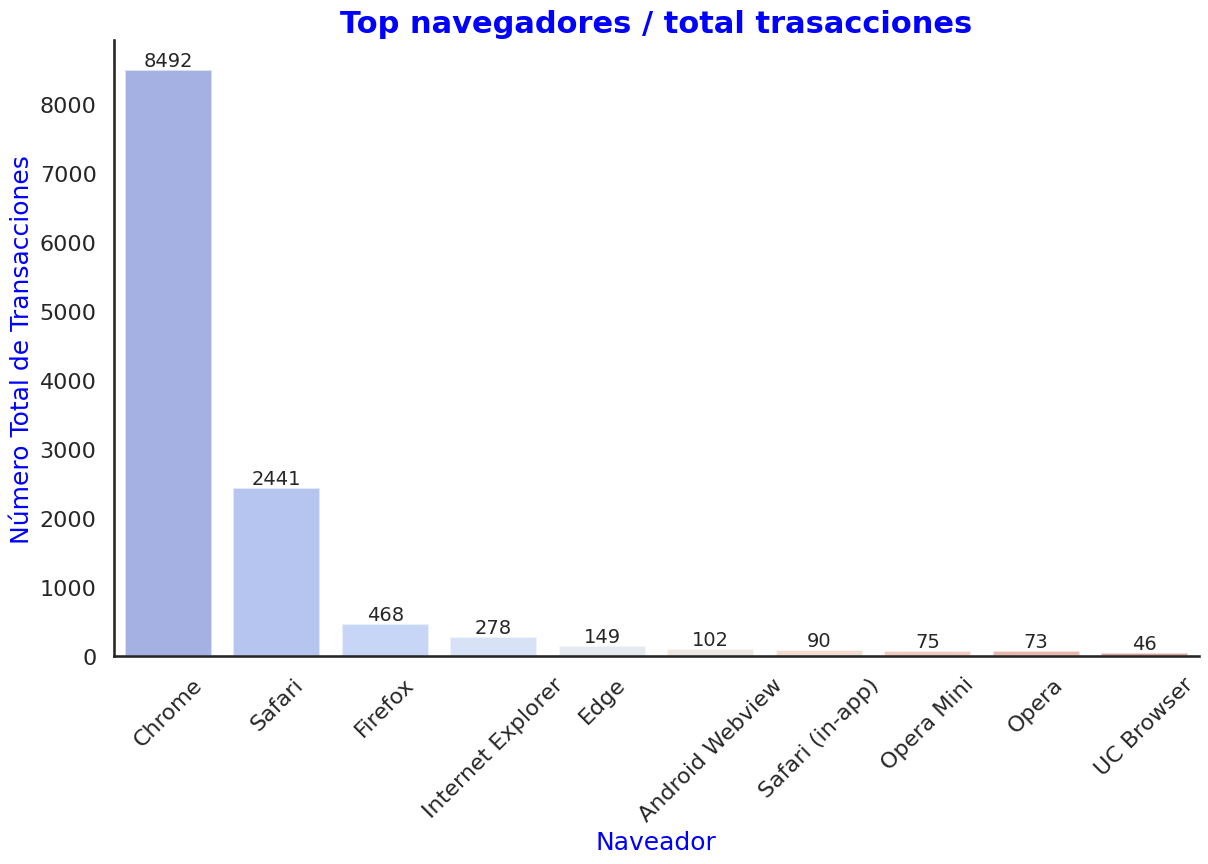

In [144]:
top_browser = df_traffic['browser'].value_counts().nlargest(10).index

df_top = df_traffic[df_traffic['browser'].isin(top_browser)]
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='browser', y='hora', data=df_top, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w', order=top_browser)

sns.despine()
plt.title('Top navegadores / total trasacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Naveador', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

conteos = df_top['browser'].value_counts().reindex(top_browser)

for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=14)

plt.show()

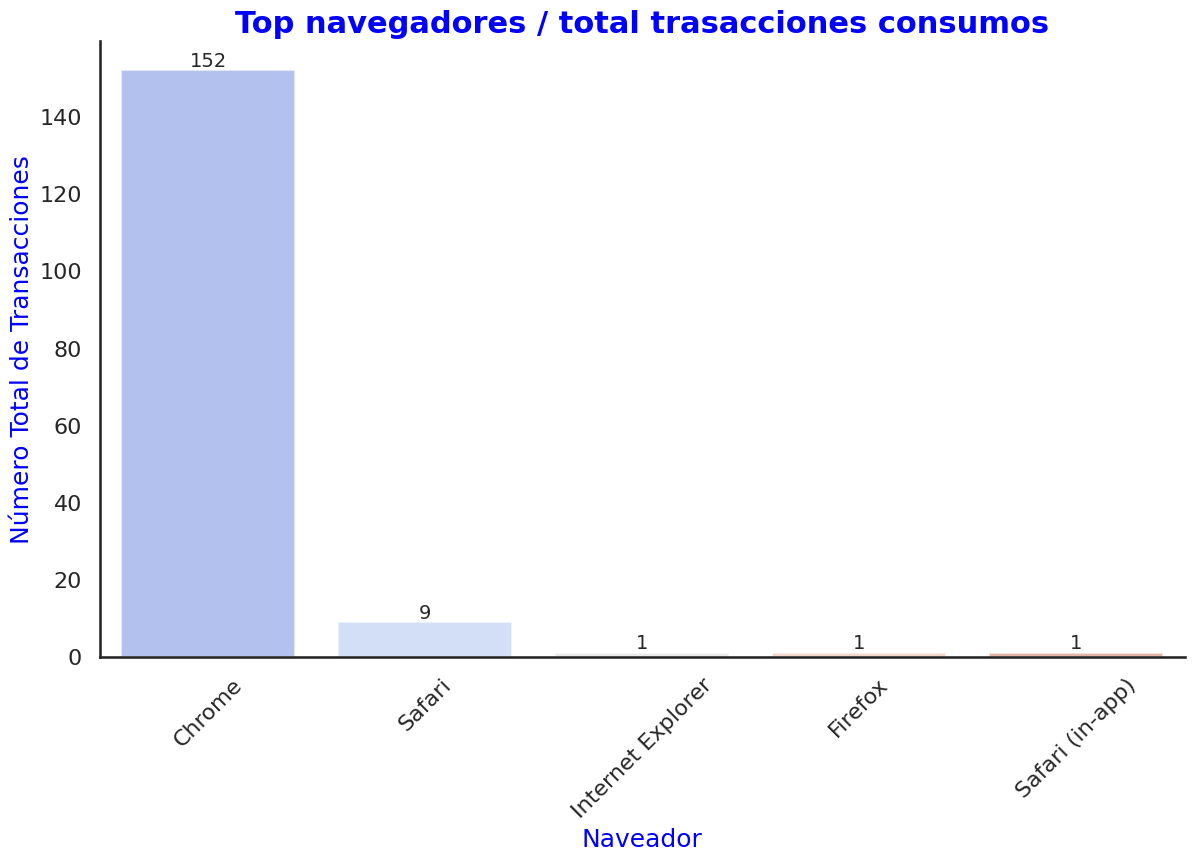

In [145]:
top_browser = df_consumos['browser'].value_counts().nlargest(10).index

df_top = df_consumos[df_traffic['browser'].isin(top_browser)]
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='browser', y='hora', data=df_top, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w', order=top_browser)

sns.despine()
plt.title('Top navegadores / total trasacciones consumos', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Naveador', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

conteos = df_top['browser'].value_counts().reindex(top_browser)

for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=14)

plt.show()

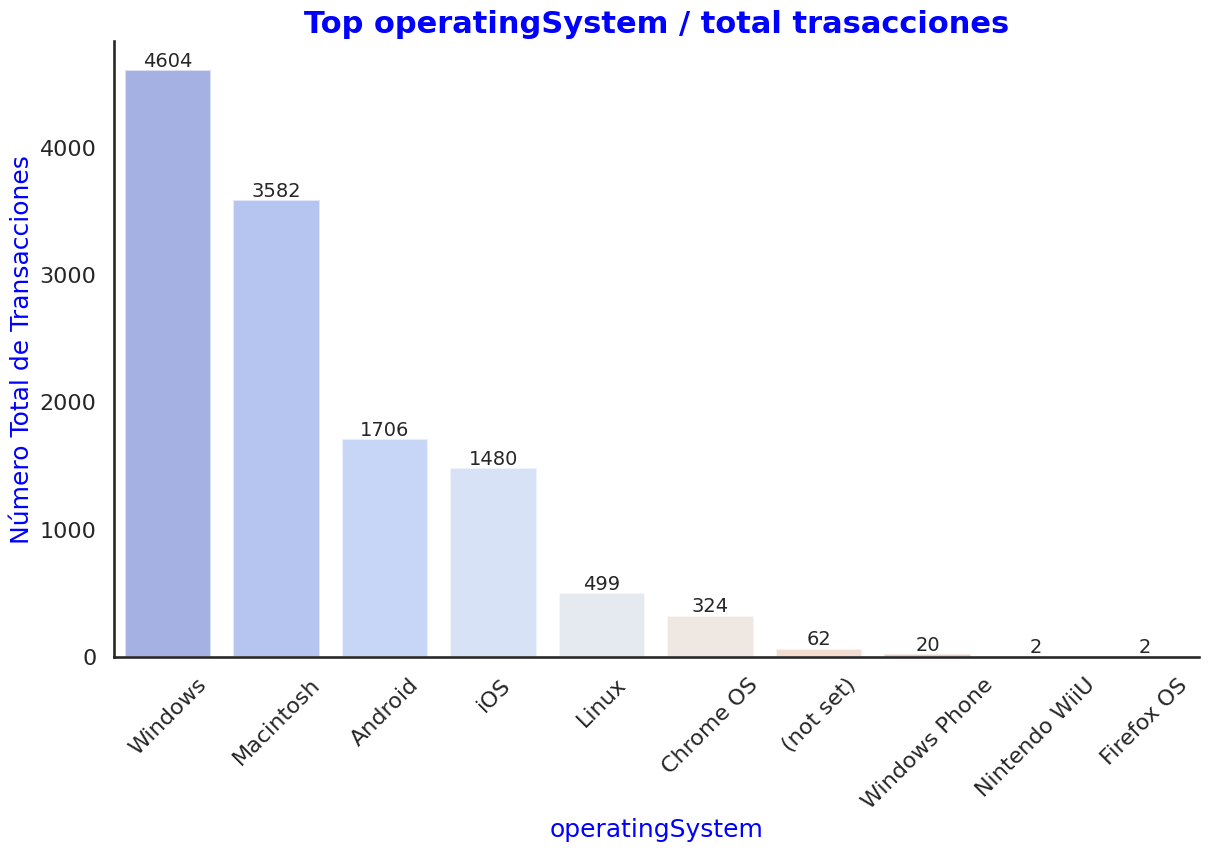

In [146]:
top_browser = df_traffic['operatingSystem'].value_counts().nlargest(10).index

df_top = df_traffic[df_traffic['operatingSystem'].isin(top_browser)]
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='operatingSystem', y='hora', data=df_top, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w', order=top_browser)

sns.despine()
plt.title('Top operatingSystem / total trasacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('operatingSystem', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

conteos = df_top['operatingSystem'].value_counts().reindex(top_browser)

for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=14)

plt.show()

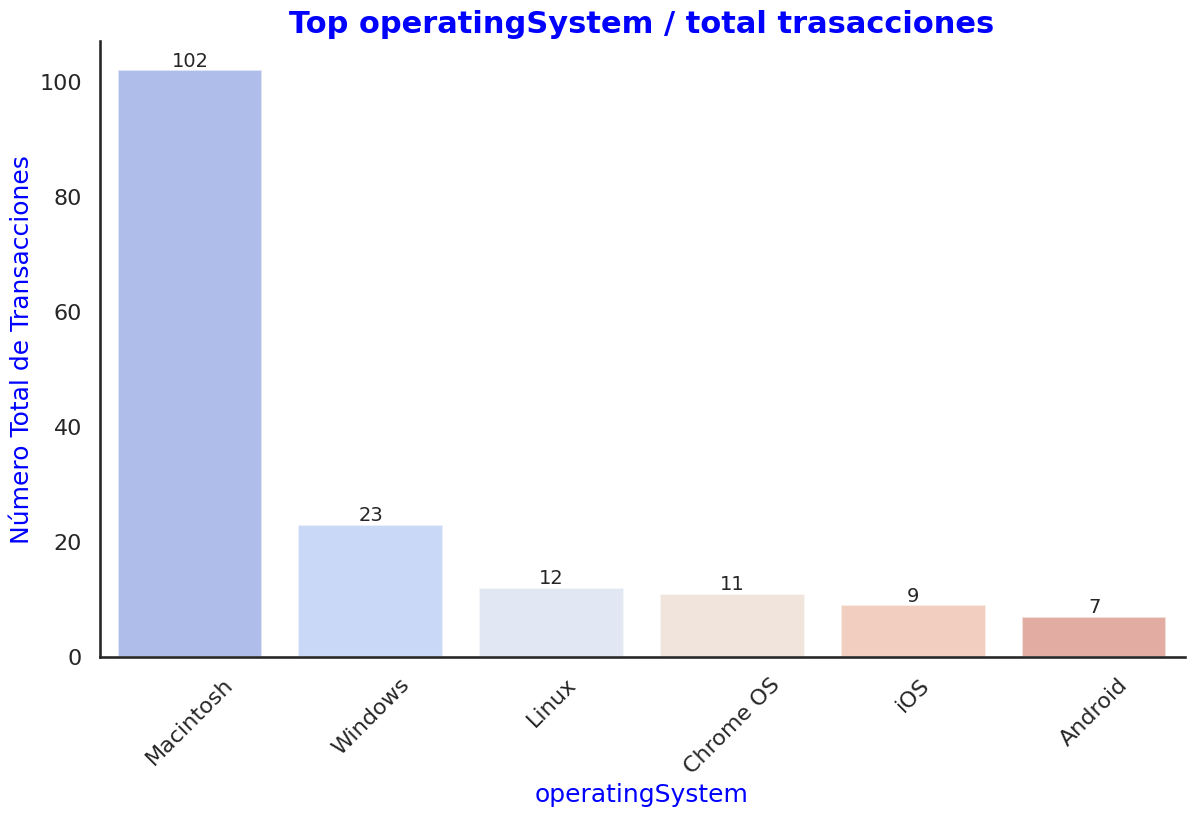

In [147]:
top_browser = df_consumos['operatingSystem'].value_counts().nlargest(10).index

df_top = df_consumos[df_consumos['operatingSystem'].isin(top_browser)]
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='operatingSystem', y='hora', data=df_top, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w', order=top_browser)

sns.despine()
plt.title('Top operatingSystem / total trasacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('operatingSystem', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

conteos = df_top['operatingSystem'].value_counts().reindex(top_browser)

for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=14)

plt.show()

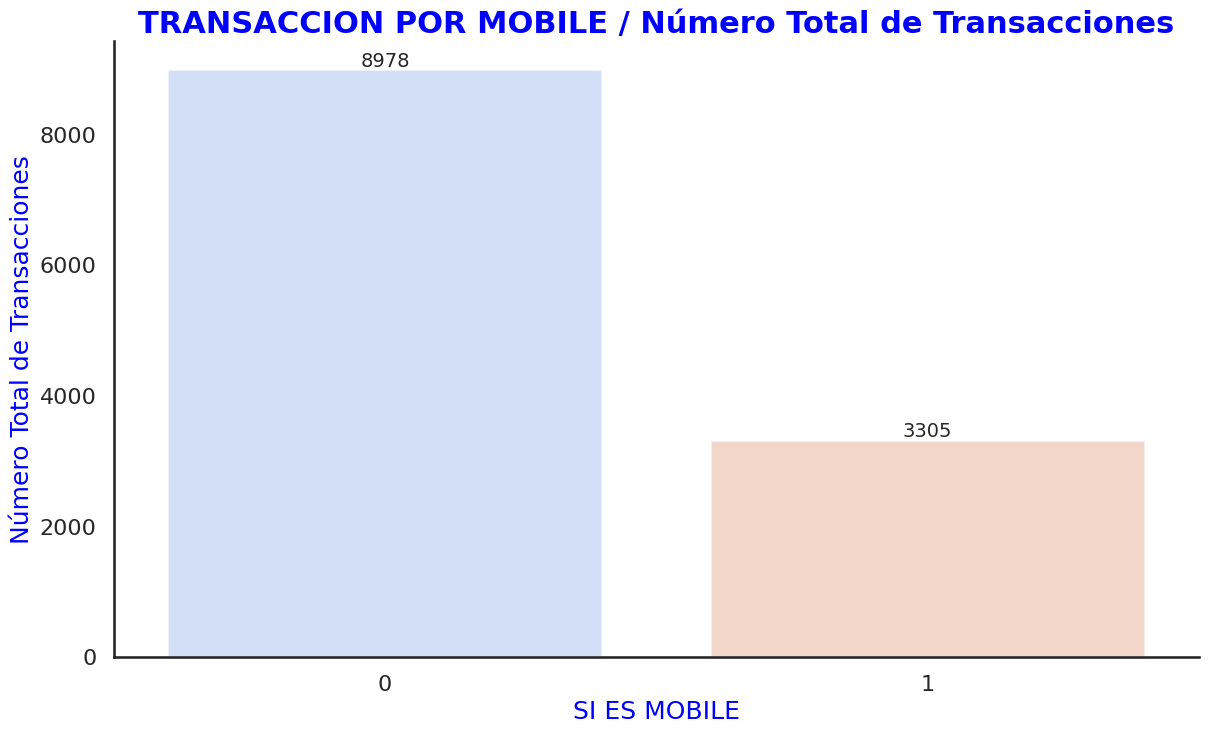

In [148]:
# MOBILE / Número Total de Transacciones
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='isMobile', y='hora', data=df_traffic, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('TRANSACCION POR MOBILE / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('SI ES MOBILE', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_traffic['isMobile'].value_counts().sort_index()
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=14)
plt.show()

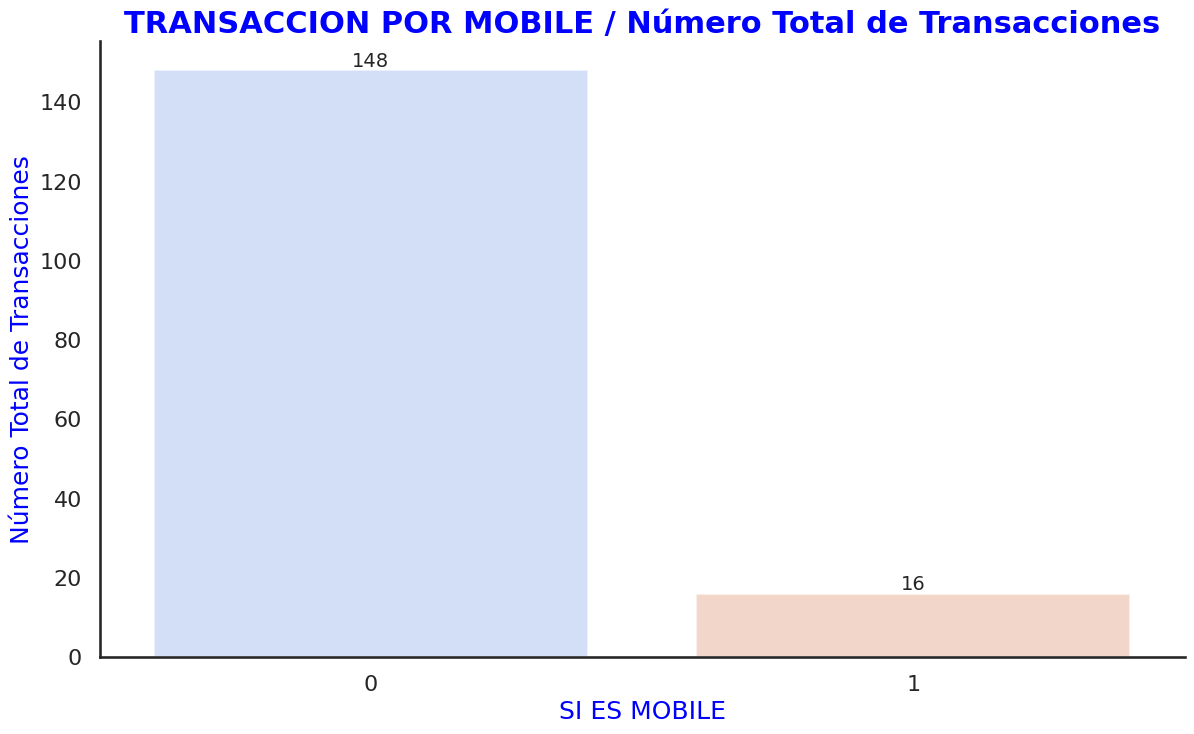

In [149]:
# MOBILE / Número Total de Transacciones
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='isMobile', y='hora', data=df_consumos, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('TRANSACCION POR MOBILE / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('SI ES MOBILE', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_consumos['isMobile'].value_counts().sort_index()
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=14)
plt.show()

# BUSCADORES
"campaign" no muestra relevancia en el análisis debido a que la mayoría de los usuarios que efectuaron consumos se encuentran en el acumulado "no set"

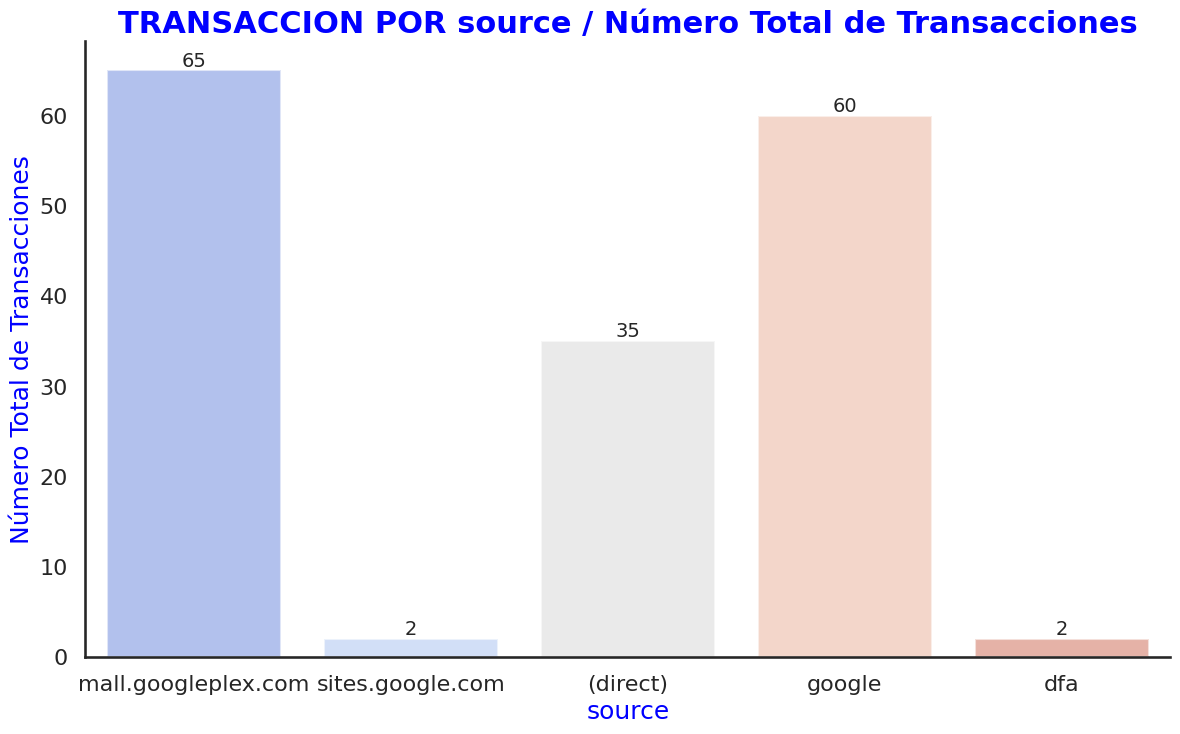

In [150]:
# source / Número Total de Transacciones
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='source', y='hora', data=df_consumos, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('TRANSACCION POR source / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('source', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_consumos['source'].value_counts().sort_index()
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=14)
plt.show()

In [151]:
conteo_buscadores = df_traffic.groupby('campaign')['source','medium'].value_counts()
conteo_buscadores

campaign                                         source                                             medium   
(not set)                                        google                                             organic      5076
                                                 youtube.com                                        referral     2882
                                                 (direct)                                           (none)       2011
                                                 mall.googleplex.com                                referral      923
                                                 analytics.google.com                               referral      216
                                                 dfa                                                cpm            71
                                                 google.com                                         referral       51
                                                 sites.google.co

In [152]:
conteo_buscadores = df_consumos.groupby('campaign')['source','medium'].value_counts()
conteo_buscadores

campaign                            source               medium  
(not set)                           mall.googleplex.com  referral    65
                                    google               organic     55
                                    (direct)             (none)      35
                                    dfa                  cpm          2
                                    sites.google.com     referral     2
AW - Accessories                    google               cpc          1
AW - Dynamic Search Ads Whole Site  google               cpc          4
dtype: int64

# la mayoria de compras que hicieron los usaurio fue por enlace directo

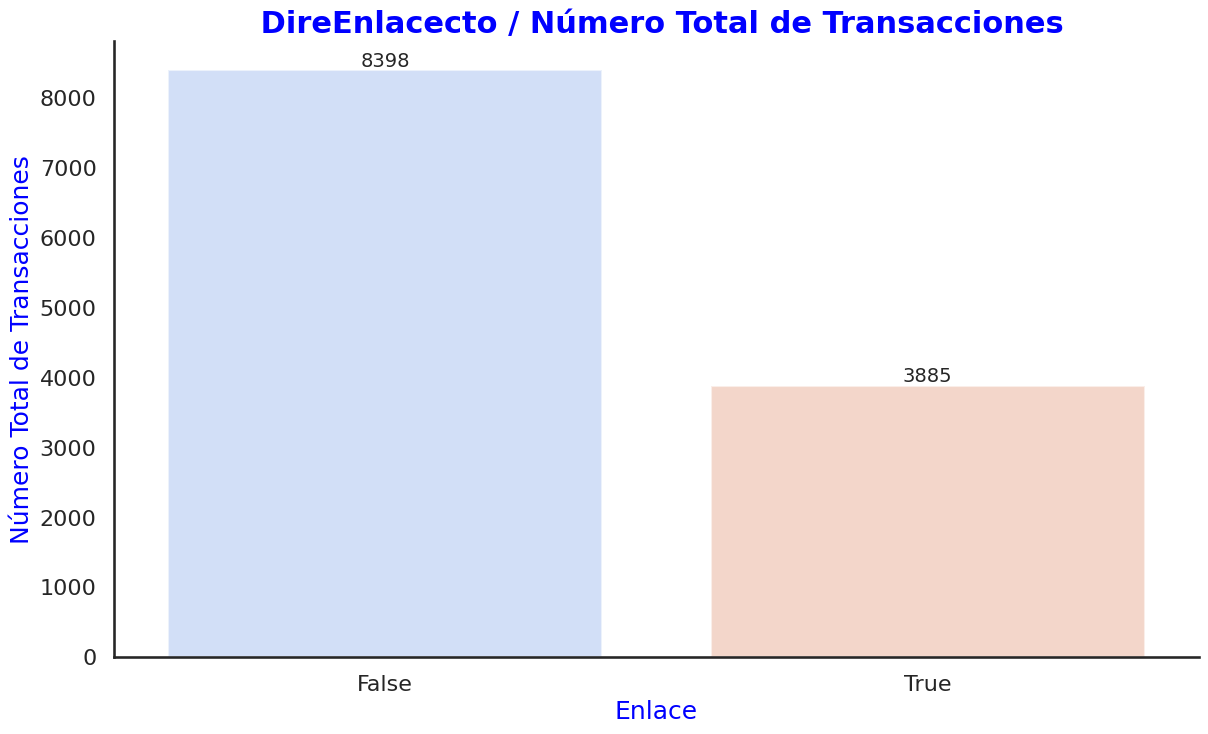

In [153]:
#Enlace/ Número Total de Transacciones
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='isTrueDirect', y='hora', data=df_traffic, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title(' DireEnlacecto / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Enlace', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_traffic['isTrueDirect'].value_counts().sort_index()
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=14)
plt.show()

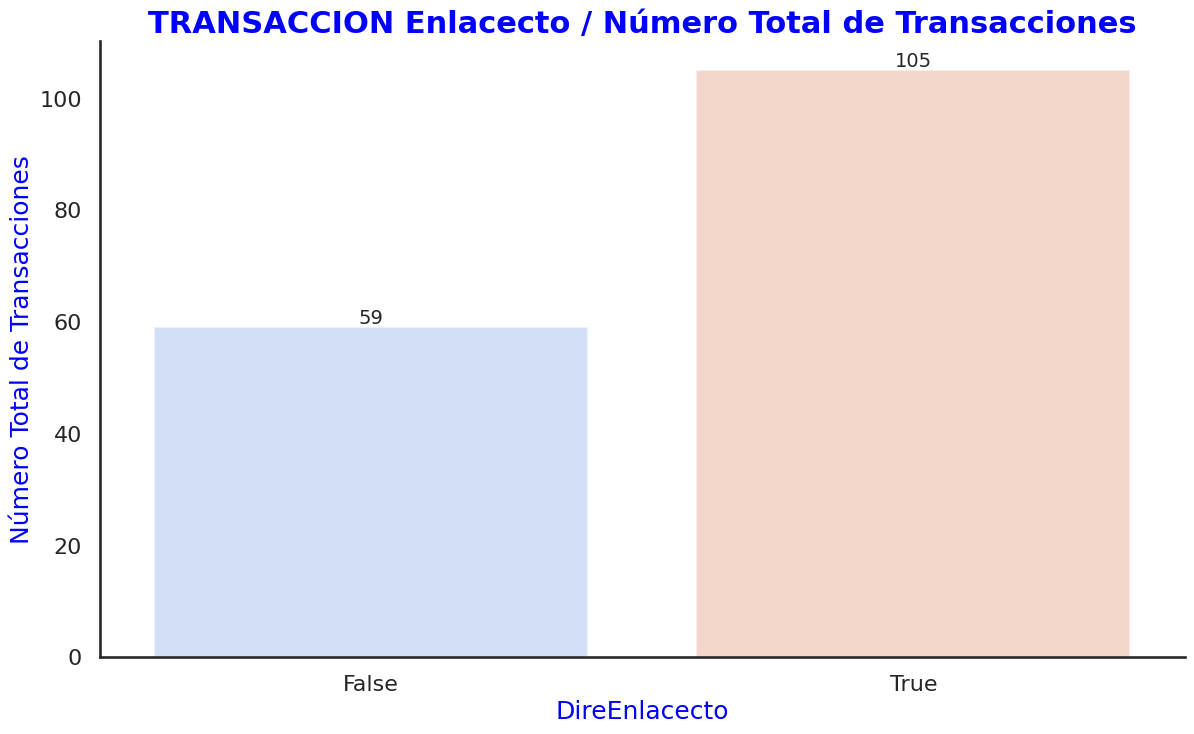

In [154]:
# DireEnlacecto / Número Total de Transacciones / Consumo
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='isTrueDirect', y='hora', data=df_consumos, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('TRANSACCION Enlacecto / Número Total de Transacciones', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('DireEnlacecto', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_consumos['isTrueDirect'].value_counts().sort_index()
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=14)
plt.show()


Se decide eliminar las variables no vayan aportar al modelo:referralPath,adwordsClickInfo.page,adwordsClickInfo.slot


In [155]:
conteo_buscadores = df_consumos.groupby('referralPath')['adwordsClickInfo.page','adwordsClickInfo.slot'].value_counts()
conteo_buscadores

referralPath                                                                        adwordsClickInfo.page  adwordsClickInfo.slot
0                                                                                   No_definido            No_Definido              92
                                                                                    1                      Top                       5
/                                                                                   No_definido            No_Definido              65
/a/google.com/google-merchandise-store/on-site-store                                No_definido            No_Definido               1
/a/google.com/googletopia/discounts-deals-and-free-stuff/alphabet-google-discounts  No_definido            No_Definido               1
dtype: int64

In [156]:
conteo_buscadores = df_traffic.groupby('referralPath')['adwordsClickInfo.slot','adwordsClickInfo.page'].value_counts()
conteo_buscadores.head(10)

referralPath                                adwordsClickInfo.slot  adwordsClickInfo.page
0                                           No_Definido            No_definido              7528
                                            Top                    1                         258
                                            RHS                    1                           6
                                            Top                    2                           1
/                                           No_Definido            No_definido              1042
/3oIBwdLr5K                                 No_Definido            No_definido                 1
/Client.html                                No_Definido            No_definido                 1
/CudkVdIGqC                                 No_Definido            No_definido                 1
/How-can-one-get-a-Google-T-shirt-in-India  No_Definido            No_definido                 9
/How-do-I-get-a-Google-I-O-t-shirt    

# Ratio de Pageviews a Hits
El ratio de pageviews a hits es una métrica valiosa que puede proporcionar importantes insights sobre la calidad del contenido y la experiencia del usuario en un sitio web. iso

In [157]:
df_traffic['ratio_pageviews_hits'] = df_traffic['pageviews'] / df_traffic['hits']
df_traffic.sample(5)

,date,channelGrouping,fullVisitorId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,...,isTrueDirect_dummy,consumo,hora,dia_semana_nombre,mes,año,dia,horario,recurrencia,ratio_pageviews_hits
3773,2016-12-01,Organic Search,3027573438887067328,1,2016-12-01 20:47:11,Safari,Macintosh,0,desktop,Europe,...,0,0,20,Thursday,12,2016,1,18:00-24:00,1,0.666667
10663,2017-02-26,Social,3562136563765488594,1,2017-02-26 08:47:10,Opera Mini,(not set),1,mobile,Asia,...,0,0,8,Sunday,2,2017,26,06:00-12:00,1,1.000000
1288,2017-03-03,Direct,1320354463278358759,2,2017-03-03 18:53:56,Chrome,Windows,0,desktop,Europe,...,1,0,18,Friday,3,2017,3,12:00-18:00,2,0.722222
333,2016-11-12,Organic Search,1353309395269601018,2,2016-11-12 19:33:04,Safari,iOS,1,mobile,Europe,...,1,0,19,Saturday,11,2016,12,18:00-24:00,2,1.000000
11896,2016-12-17,Direct,5846426539382098258,1,2016-12-17 14:03:59,Android Webview,Android,1,mobile,Europe,...,1,0,14,Saturday,12,2016,17,12:00-18:00,1,1.000000


# interaccion_por_visita:
Esta métrica puede ayudar a entender cuánto interactúa un usuario en promedio por visita, lo que podría ser un indicador de que tal rapido encuentra el producto a comprar

In [158]:
df_traffic['interaccion_por_visita'] = df_traffic['hits'] / df_traffic['visitNumber']
df_traffic.sample(5)

,date,channelGrouping,fullVisitorId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,deviceCategory,continent,...,consumo,hora,dia_semana_nombre,mes,año,dia,horario,recurrencia,ratio_pageviews_hits,interaccion_por_visita
8622,2017-01-23,Referral,1984614784270823701,1,2017-01-23 16:24:40,Chrome,Macintosh,0,desktop,Europe,...,0,16,Monday,1,2017,23,12:00-18:00,1,1.000000,2.0
3735,2017-06-20,Referral,5885680225521012529,1,2017-06-20 14:44:26,Firefox,Windows,0,desktop,Europe,...,0,14,Tuesday,6,2017,20,12:00-18:00,1,1.000000,1.0
10527,2017-04-04,Organic Search,2761824185690808203,2,2017-04-04 23:25:36,Chrome,Windows,0,desktop,Americas,...,0,23,Tuesday,4,2017,4,18:00-24:00,4,0.700000,5.0
7312,2017-02-02,Organic Search,6011793050397164658,1,2017-02-03 01:01:28,Chrome,Macintosh,0,desktop,Americas,...,0,1,Friday,2,2017,3,0:00-06:00,1,0.666667,12.0
5983,2016-09-03,Organic Search,3174136226897552319,1,2016-09-03 16:19:52,Chrome,Windows,0,desktop,Asia,...,0,16,Saturday,9,2016,3,12:00-18:00,1,1.000000,5.0


In [159]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    12283 non-null  datetime64[ns]
 1   channelGrouping         12283 non-null  object        
 2   fullVisitorId           12283 non-null  object        
 3   visitNumber             12283 non-null  int64         
 4   visitStartTime          12283 non-null  datetime64[ns]
 5   browser                 12283 non-null  object        
 6   operatingSystem         12283 non-null  object        
 7   isMobile                12283 non-null  int64         
 8   deviceCategory          12283 non-null  object        
 9   continent               12283 non-null  object        
 10  subContinent            12283 non-null  object        
 11  country                 12283 non-null  object        
 12  region                  12283 non-null  object

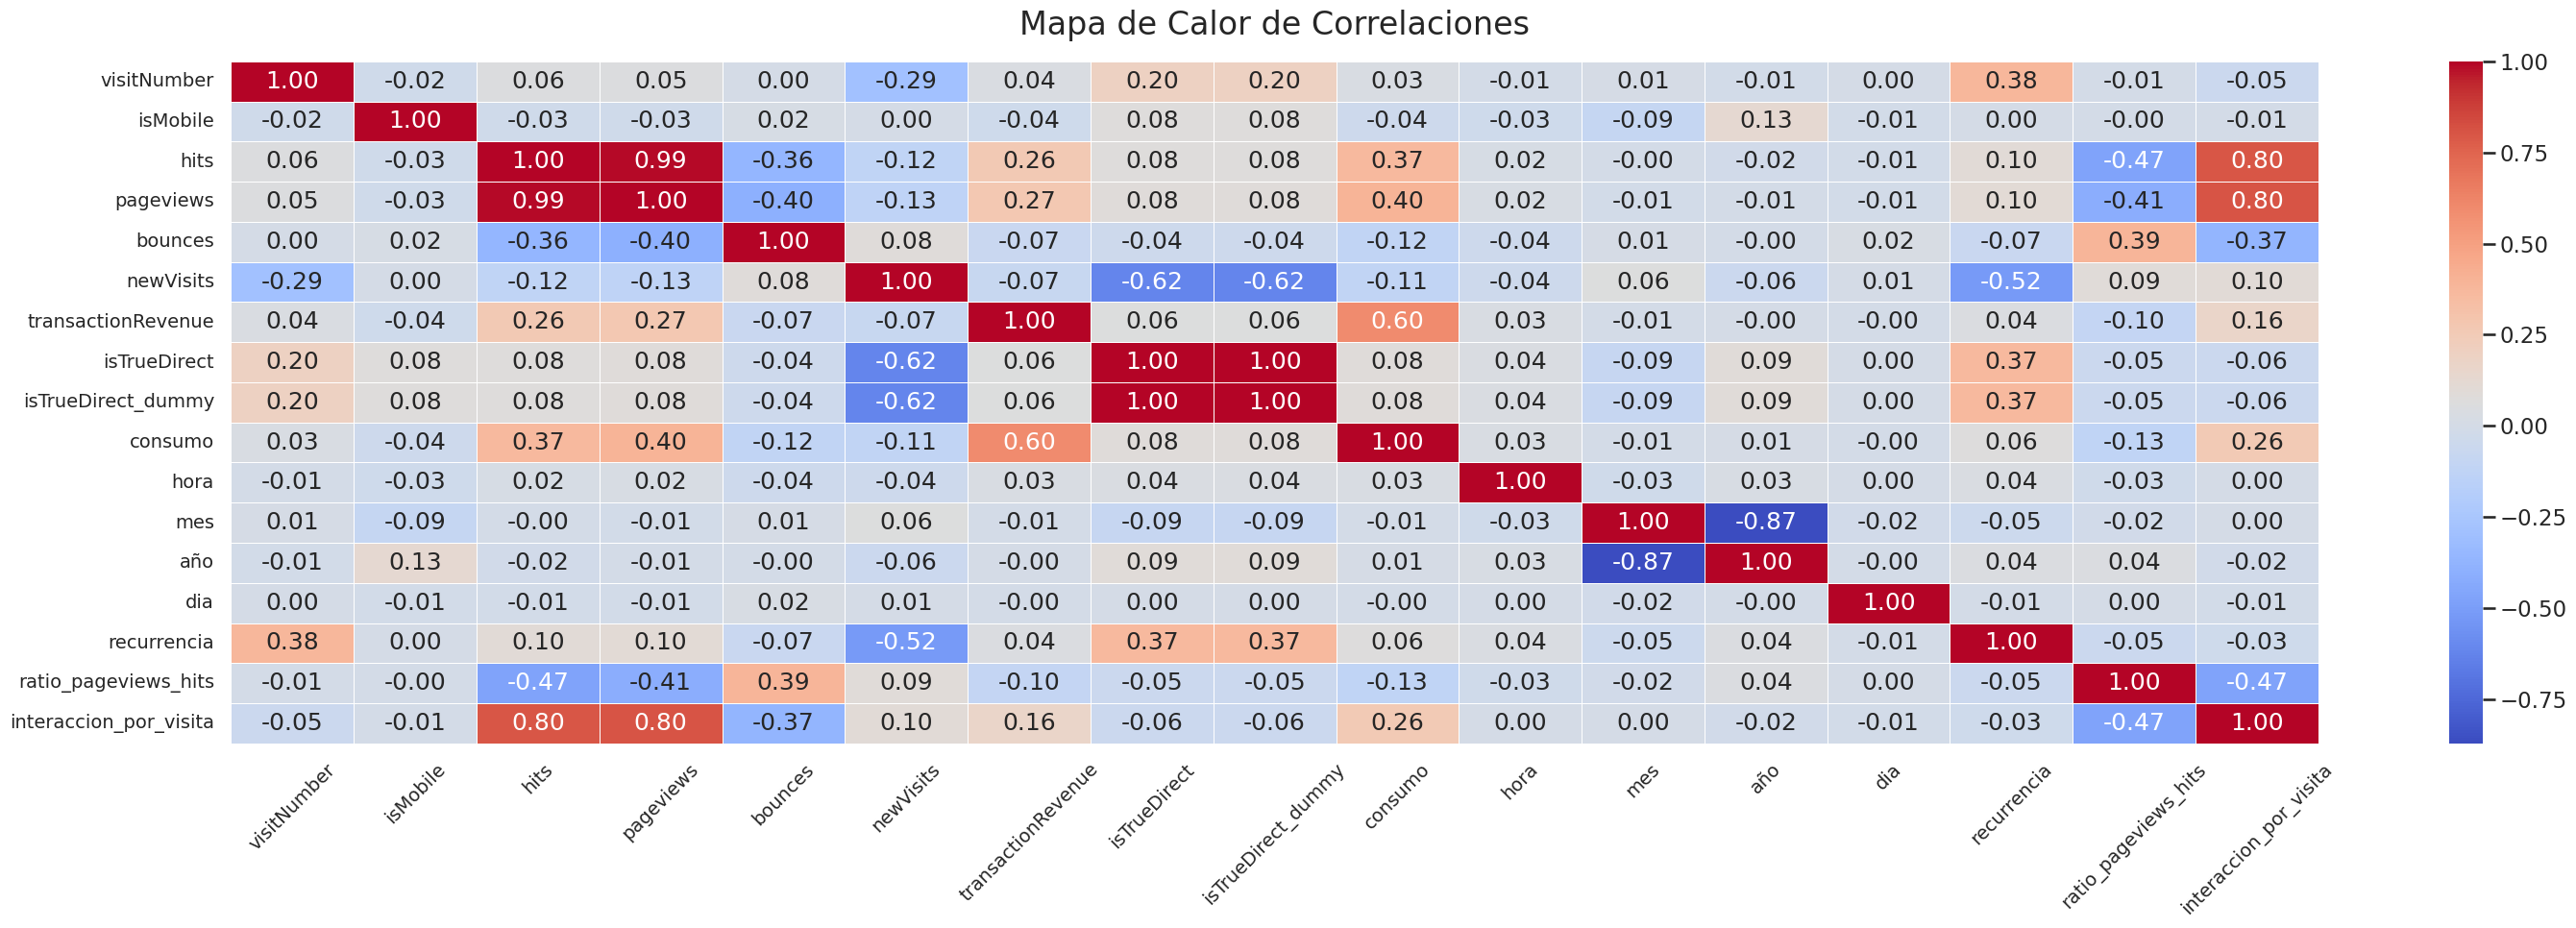

In [160]:
sns.set_style("white")
sns.set_context("talk")
plt.figure(figsize=(30, 10))
corr_matrix = df_traffic.corr(numeric_only=True)
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white')
heatmap.tick_params(axis='x', which='major', labelsize=14, rotation=45)
heatmap.tick_params(axis='y', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=24, pad=20)
plt.tight_layout()
plt.show()

# DISTRIBUCION DE LOS DATOS POR AÑO

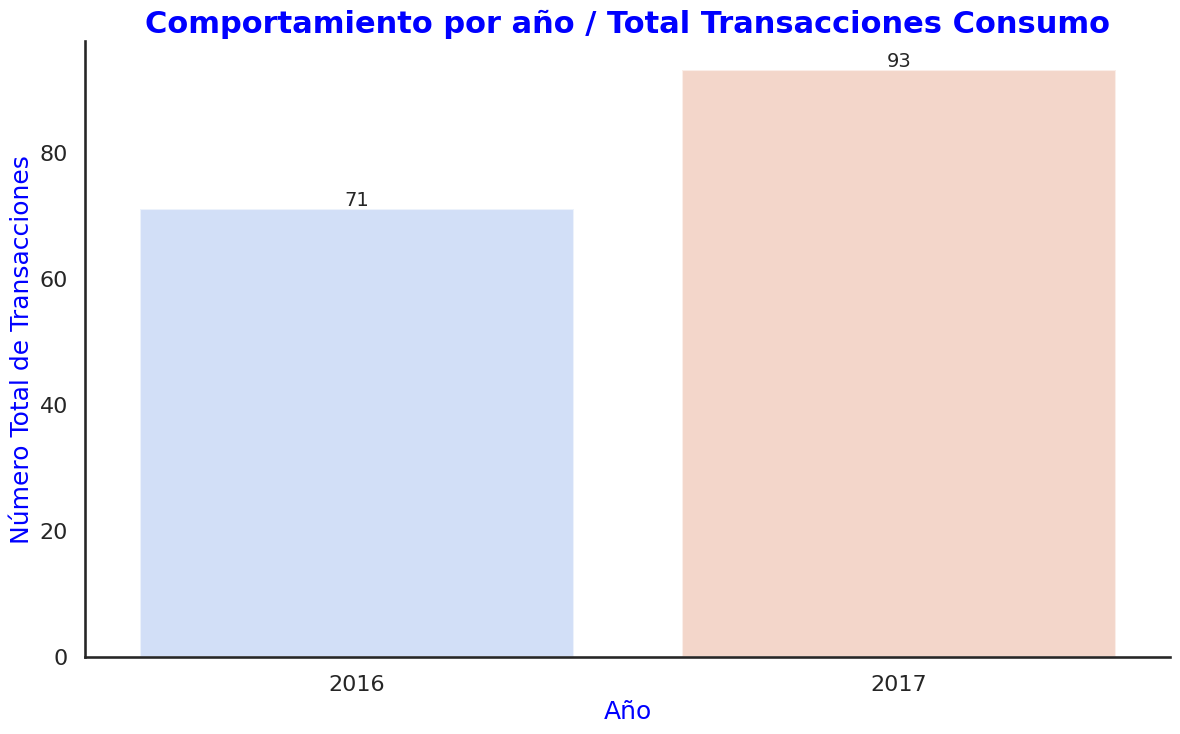

In [161]:
# Comportamiento por Hora / Número Total de Transacciones CONSUMO

plt.figure(figsize=(14, 8))

bar_plot = sns.barplot(x='año', y='hora', data=df_consumos, estimator=len,
                       palette='coolwarm', alpha=0.6, edgecolor='w')
sns.despine()
plt.title('Comportamiento por año / Total Transacciones Consumo', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Año', fontsize=18, color='blue')
plt.ylabel('Número Total de Transacciones', fontsize=18, color='blue')
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)

conteos_por_hora = df_consumos.groupby('hora').size()
for bar in bar_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
             f'{int(bar.get_height())}',
             ha='center', va='bottom', fontsize=14)
plt.show()

In [162]:
df_traffic.to_csv('df_traffic',index=False)
df_consumos.to_csv('df_consumos' ,index=False)